# Early Childhood Opportunities: Is New York City’s PreK for All Program Benefiting the Communities that Need It Most?


## An Exploratory Data Project by Kevin McKeown

### Introduction

New York City’s “PreK for All” program (alternatively known as universal Pre-K, or “UPK”)  was initiated in 2014 by Mayor Bill De Blasio’s administration, a delivery on promises made in his 2013 mayoral campaign. Prior to the program’s existence, New York City’s Department of Education (DOE) provided seats for only half of its PreK-aged (4 years-old) population. For those unable to secure a seat, the only options were family care (stay-at-home parent, extended family), hiring child-care, or to pay for (often costly) private child-care programs. The program was driven by a progressive cause that publicly-funded institutions should provide comprehensive services for the communities they represent.

The program has grown rapidly since its introduction. In its first year (Fall 2014) there were 53,120 enrollees in NYC PreK programs, more than doubling the numbers from the previous year (19,163, Fall 2013). By Fall 2015 it had expanded 68,547 enrollees, a 29% increase from the program’s first year. There are currently more than 70,000 enrollees throughout NYC DOE facilities, publicly-funded New York City Early Education Centers (NYCEEC), and Charter schools. The program has been lauded by The Ash Center at Harvard University as being one of the “Top 25 Innovations in American Government”, and has been praised by Early Childhood experts and parents alike. However, the program has received some criticism for its universality: it is open to all New Yorkers, regardless of income or location, meaning that program resources are being spent on those who would otherwise be able to afford non-public programs.

## Goal

#### The aims of this project are to: <br>
1) explore the distributions of PreK for All locations and of Non-Public/Tuition-based PreK locations in New York City, and <br> 

2) find out if/how these distributions have relationships with economic and demographic data.


### Questions
 - How does the distribution of PreK for All locations compare to the distribution of Non-Public PreK programs?

    -   Are there any areas of significant overlap between these two distributions?

 - Are there demographic-based or economic-based characteristics linked to these distributions?
 - Do the number of PreK for All program seats available scale to the populations of individual communities?

## Data

The data on the PreK for All program is available from NYC’s OpenData website: <br>
(https://data.cityofnewyork.us/Education/Universal-Pre-K-UPK-School-Locations/kiyv-ks3f/data) <br>

I put together the data set of Non-Public PreK programs operating in NYC from various sources: <br>
(https://www.privateschoolreview.com/new-york/daycare-private-schools) <br>
(http://www.newyorkfamily.com/new-york-familys-2018-nyc-preschool-directory) <br>
(http://www.p12.nysed.gov/irs/schoolDirectory/documents/PubSchDir1718_101117.pdf) <br>

I pulled NYC population data from the New York City Department of City Planning website: <br>
(https://www1.nyc.gov/site/planning/data-maps/nyc-population/current-future-populations.page) <br>

And I pulled data for Mean Household Income across NYC's five boroughs, broken up by postcode, from the US Census Bureau American FactFinder Website: <br>
(https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S1902&prodType=table) <br>

In addition, there are several map visualizations in this notebook which I made using Tableau Desktop Software. <br>
All economic and demographic data in those maps were supplied by Tableau.

### Checking the Data

Before we do any analysis, let's take a look at our data to make sure nothing is amiss.

I'll load up our data on the PreK for All locations first:

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

u_pk = pd.read_csv('Universal_Pre-K__UPK__School_Locations.csv')

And let's take a quick look at it:

In [2]:
u_pk.head()

,LOCCODE,PreK_Type,Borough,LocName,NOTE,phone,address,Postcode,Day_Length,Seats,...,EXTENDED_DAY,SEMS_CODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,K001,DOE,K,P.S. 001 The Bergen,NaN,718-567-7661,309 47 St,11220,1,125,...,3,15K001,40.649042,-74.012289,7,38,80,3011821.0,3.007550e+09,Sunset Park West ...
1,K003,DOE,K,P.S. 003 The Bedford Village,NaN,718-622-2960,50 Jefferson Ave,11216,1,90,...,3,13K003,40.682663,-73.955338,3,36,227,3057406.0,3.019980e+09,Clinton Hill ...
2,K005,DOE,K,P.S. 005 Dr. Ronald Mcnair,NaN,718-574-2333,820 Hancock St,11233,1,36,...,3,16K005,40.685695,-73.922463,3,41,377,3039906.0,3.014900e+09,Stuyvesant Heights ...
3,K007,DOE,K,P.S. 007 Abraham Lincoln,NaN,718-647-3600,858 Jamaica Ave,11208,1,36,...,3,19K007,40.689697,-73.873109,5,37,118201,3090998.0,3.041060e+09,Cypress Hills-City Line ...
4,K009,DOE,K,P.S. 009 Teunis G Bergen,NaN,718-638-3260,80 Underhill Ave,11238,1,90,...,3,13K009,40.678297,-73.965541,8,35,205,3028204.0,3.011450e+09,Prospect Heights ...


Now to check for any possibly missing data points:

In [3]:
u_pk.describe()

,Postcode,Day_Length,Seats,X,Y,MEALS,INDOOR_OUTDOOR,EXTENDED_DAY,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,1885.000000,1885.000000,1885.000000,1.885000e+03,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1.709000e+03,1.710000e+03
mean,10889.529443,1.118302,46.085411,1.006466e+06,202287.140053,3.551194,5.380371,2.127851,40.721911,-73.919673,7.749072,27.102387,7714.013793,2.936632e+06,2.844937e+09
std,517.581284,0.504028,34.164670,2.431184e+04,31677.585801,1.529662,2.641362,0.927347,0.086952,0.087821,4.970738,14.333961,22697.100534,1.181621e+06,1.145241e+09
min,10001.000000,1.000000,6.000000,9.157910e+05,124757.000000,1.000000,1.000000,1.000000,40.508809,-74.246427,1.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,10455.000000,1.000000,21.000000,9.943210e+05,178353.000000,2.000000,3.000000,1.000000,40.656046,-73.963494,3.000000,15.000000,185.000000,2.026706e+06,2.030245e+09
50%,11208.000000,1.000000,36.000000,1.005736e+06,198597.000000,3.000000,6.000000,3.000000,40.711824,-73.922264,7.000000,27.000000,381.000000,3.097973e+06,3.032185e+09
75%,11237.000000,1.000000,54.000000,1.020888e+06,229505.000000,5.000000,8.000000,3.000000,40.796762,-73.866977,12.000000,39.000000,918.000000,4.012089e+06,4.006875e+09
max,11697.000000,5.000000,500.000000,1.064960e+06,270141.000000,9.000000,9.000000,3.000000,40.908305,-73.709198,83.000000,51.000000,157903.000000,5.167549e+06,5.079140e+09


Looks like we have 1885 entries for all the relevant columns (every one except BIN and BBL, which we won't be using). <br>
So now I'll check out our indices so we know how to pull them later:

In [4]:
u_pk.axes

[RangeIndex(start=0, stop=1885, step=1),
 Index(['LOCCODE', 'PreK_Type', 'Borough', 'LocName', 'NOTE', 'phone',
        'address', 'Postcode', 'Day_Length', 'Seats', 'X', 'Y', 'Email',
        'Website', 'MEALS', 'INDOOR_OUTDOOR', 'EXTENDED_DAY', 'SEMS_CODE',
        'Latitude', 'Longitude', 'Community Board', 'Council District ',
        'Census Tract', 'BIN', 'BBL', 'NTA'],
       dtype='object')]

That all looks swell, so now it's time to check out our data on Non-Public PreK locations:

In [5]:
p_pk = pd.read_csv('private pre-K programs.csv')

p_pk.head()

,Row Number,School Name,Borough,Address,Postcode,Lat,Long,Neighborhood,Ages,Website
0,1,14th Street Y Preschool,M,"344 East 14th Street, New York NY",10003,40.731262,-73.983416,East Village,2.4 years - 5,https://www.14streety.org/early-childhood/pres...
1,2,74th Street Magic,M,"510 E 74th St, New York NY",10021,40.767760,-73.952096,Upper East Side,Infant - 13 years,http://www.74magic.com/
2,3,92nd Street Y Nursery School,M,"1395 Lexington Avenue, New York NY",10128,40.782929,-73.952422,Upper East Side,2.6-5 years,http://www.92y.org/content/nursery_school.asp
3,4,Abraham Joshua Heschel School,M,"30 West End Avenue, New York NY",10023,40.772558,-73.989385,Upper West Side,Nursery-Grade 12,http://www.heschel.org/
4,5,ACADEMY OF ST DOROTHY,R,"1305 Hylan Blvd, Staten Island, NY",10305,40.597386,-74.086509,Staten Island,PreK - Grade 8,https://academyofstdorothy.org/


In [6]:
p_pk.describe()

,Row Number,Postcode,Lat,Long
count,435.000000,435.000000,435.000000,435.000000
mean,218.441379,10558.940230,40.725153,-73.952652
std,126.145747,749.924937,0.071699,0.073180
min,1.000000,1213.000000,40.526357,-74.216694
25%,109.500000,10023.000000,40.677346,-73.988235
50%,218.000000,10282.000000,40.734927,-73.967440
75%,327.500000,11219.000000,40.777022,-73.940942
max,436.000000,11694.000000,40.903811,-73.721722


In [7]:
p_pk.axes

[RangeIndex(start=0, stop=435, step=1),
 Index(['Row Number', 'School Name', 'Borough', 'Address', 'Postcode', 'Lat',
        'Long', 'Neighborhood', 'Ages', 'Website'],
       dtype='object')]

And all looks swell with our Non-Public PreK data, too (as I would expect, seeing as I'm the one who put it together!), so we'll finish up by checking out our NYC population data:

In [8]:
nyc_pop = pd.read_csv('NYC Population by County.csv')

nyc_pop

,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate - 2010,Population Estimate - 2011,Population Estimate - 2012,Population Estimate - 2013,Population Estimate - 2014,Population Estimate - 2015,Population Estimate - 2016,Population Estimate - 2017
0,0500000US36005,36005,"Bronx County, New York",1385108,1384794,1388122,1400899,1417864,1432881,1445800,1460412,1468976,1471160
1,0500000US36047,36047,"Kings County, New York",2504700,2504706,2510842,2546662,2579267,2605783,2626644,2643546,2650859,2648771
2,0500000US36061,36061,"New York County, New York",1585873,1586184,1589217,1611550,1630367,1638790,1646521,1657183,1662164,1664727
3,0500000US36081,36081,"Queens County, New York",2230722,2230545,2235764,2262013,2284413,2307766,2328004,2346005,2356044,2358582
4,0500000US36085,36085,"Richmond County, New York",468730,468730,469758,471564,471593,473422,474166,475313,477383,479458


In [9]:
nyc_pop.describe()

,Id2,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate - 2010,Population Estimate - 2011,Population Estimate - 2012,Population Estimate - 2013,Population Estimate - 2014,Population Estimate - 2015,Population Estimate - 2016,Population Estimate - 2017
count,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,36055.800000,1.635027e+06,1.634992e+06,1.638741e+06,1.658538e+06,1.676701e+06,1.691728e+06,1.704227e+06,1.716492e+06,1.723085e+06,1.724540e+06
std,32.298607,7.962895e+05,7.962779e+05,7.982450e+05,8.109315e+05,8.224001e+05,8.320266e+05,8.401065e+05,8.463651e+05,8.487429e+05,8.476763e+05
min,36005.000000,4.687300e+05,4.687300e+05,4.697580e+05,4.715640e+05,4.715930e+05,4.734220e+05,4.741660e+05,4.753130e+05,4.773830e+05,4.794580e+05
25%,36047.000000,1.385108e+06,1.384794e+06,1.388122e+06,1.400899e+06,1.417864e+06,1.432881e+06,1.445800e+06,1.460412e+06,1.468976e+06,1.471160e+06
50%,36061.000000,1.585873e+06,1.586184e+06,1.589217e+06,1.611550e+06,1.630367e+06,1.638790e+06,1.646521e+06,1.657183e+06,1.662164e+06,1.664727e+06
75%,36081.000000,2.230722e+06,2.230545e+06,2.235764e+06,2.262013e+06,2.284413e+06,2.307766e+06,2.328004e+06,2.346005e+06,2.356044e+06,2.358582e+06
max,36085.000000,2.504700e+06,2.504706e+06,2.510842e+06,2.546662e+06,2.579267e+06,2.605783e+06,2.626644e+06,2.643546e+06,2.650859e+06,2.648771e+06


In [10]:
nyc_pop.axes

[RangeIndex(start=0, stop=5, step=1),
 Index(['Id', 'Id2', 'Geography', 'April 1, 2010 - Census',
        'April 1, 2010 - Estimates Base', 'Population Estimate - 2010',
        'Population Estimate - 2011', 'Population Estimate - 2012',
        'Population Estimate - 2013', 'Population Estimate - 2014',
        'Population Estimate - 2015', 'Population Estimate - 2016',
        'Population Estimate - 2017'],
       dtype='object')]

And finally let's load up the last set of data we'll be working with--mean household income and total households for each postcode in NYC.

In [11]:
nyc_income = pd.read_csv('Household Income NYC by Postcode.csv')

nyc_income.head()

,Postcode,Mean income (dollars),Total households
0,10001,162724,11967
1,10002,64196,33327
2,10003,171737,27258
3,10004,173800,1592
4,10007,392959,2743


In [12]:
nyc_income.describe()

,Postcode,Mean income (dollars),Total households
count,175.000000,175.000000,175.000000
mean,10832.908571,90949.034286,17738.731429
std,570.671587,52813.432675,9617.099092
min,10001.000000,0.000000,0.000000
25%,10304.500000,61249.000000,10409.000000
50%,11203.000000,77930.000000,16086.000000
75%,11362.500000,97585.000000,25991.000000
max,11694.000000,392959.000000,42783.000000


Uh oh....<br>

It looks like we have at least one entry with no households. This may or may not be problematic for our analysis, but regardless it is a good signal that it is time for:

### Cleaning the Data!

And let's start with these household-less entries in our income dataframe.

In [13]:
nyc_income[nyc_income['Total households']==0]

,Postcode,Mean income (dollars),Total households
122,11376,0,0
123,11430,0,0
125,11679,0,0


So it looks like we have multiple entries with no households, and, unsurpsingly, they also have no mean income associated with them (after all, no one allegedly lives there). <br>
There could be several reasons why these postcodes lack these data points, such as being zoned for industrial/non-residential use. If that is the case for these postcodes, then they might not have any PreK locations associated with them--hence, not pose a problem for our analysis. <br>
Let's find out:

In [14]:
u_pk[u_pk['Postcode']==11376]

,LOCCODE,PreK_Type,Borough,LocName,NOTE,phone,address,Postcode,Day_Length,Seats,...,EXTENDED_DAY,SEMS_CODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
1154,QASX,NYCEEC,Q,"Children's Big Apple, Inc.",NaN,718-565-5311,4126 Case St,11376,1,18,...,2,24QASX,40.746865,-73.873573,4,25,467,4039116.0,4.015650e+09,Elmhurst ...


Good thing we looked, right?<br>

Luckily, a quick Google map search of the address (4126 Case St) reveals that the postcode here is erroneous: <br>
It should be 11373, not 11376. Let's correct this.

In [15]:
u_pk.loc[[1154], ['Postcode']] = 11373

u_pk.loc[1154]

LOCCODE                                                           QASX
PreK_Type                                                       NYCEEC
Borough                                                              Q
LocName                                     Children's Big Apple, Inc.
NOTE                                                               NaN
phone                                                     718-565-5311
address                                                   4126 Case St
Postcode                                                         11373
Day_Length                                                           1
Seats                                                               18
X                                                              1019264
Y                                                               211355
Email                                              marcushuang@aol.com
Website                                                            NaN
MEALS 

Double-check with out Non-Public PreK locations:

In [16]:
p_pk[p_pk['Postcode']==11376]

,Row Number,School Name,Borough,Address,Postcode,Lat,Long,Neighborhood,Ages,Website


Since there are no locations associated with this postcode, it might suit our data analysis purposes to drop the entry altogether.

In [17]:
nyc_income = nyc_income.drop([122])

nyc_income[nyc_income['Total households']==0]

,Postcode,Mean income (dollars),Total households
123,11430,0,0
125,11679,0,0


And we've eliminated one potential problem. <br>

Let's move onto our next household-less entry:

In [18]:
u_pk[u_pk['Postcode']==11430]

,LOCCODE,PreK_Type,Borough,LocName,NOTE,phone,address,Postcode,Day_Length,Seats,...,EXTENDED_DAY,SEMS_CODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
1200,QAVJ,NYCEEC,Q,Jfkidsport,NaN,718-553-5437,Jfk Airport Building 350,11430,1,36,...,1,27QAVJ,40.648244,-73.788242,83,28,716,4000000.0,4.142600e+09,Airport ...


So we've got a location here, but we've also stumbled upon and explanation: <br>
Postcode 11430 is associated with JFK Airport. It makes sense that there are no households here--but likely airport employees who need access to childcare. <br>
Since this postcode does not represent data for people enrolled at this PreK location, we'll drop it as well.

In [19]:
nyc_income = nyc_income.drop([123])

nyc_income[nyc_income['Total households']==0]

,Postcode,Mean income (dollars),Total households
125,11679,0,0


Onto our last household-less entry:

In [20]:
u_pk[u_pk['Postcode']==11679]

,LOCCODE,PreK_Type,Borough,LocName,NOTE,phone,address,Postcode,Day_Length,Seats,...,EXTENDED_DAY,SEMS_CODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA


In [21]:
p_pk[p_pk['Postcode']==11679]

,Row Number,School Name,Borough,Address,Postcode,Lat,Long,Neighborhood,Ages,Website


Since there are no PreK locations associated here, it is of no consequence for us--let's drop it.


In [22]:
nyc_income = nyc_income.drop([125])

nyc_income[nyc_income['Total households']==0]

,Postcode,Mean income (dollars),Total households


Now with our income data taken care of, let's turn back to our PreK location data.

In [23]:
u_pk.head()

,LOCCODE,PreK_Type,Borough,LocName,NOTE,phone,address,Postcode,Day_Length,Seats,...,EXTENDED_DAY,SEMS_CODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,K001,DOE,K,P.S. 001 The Bergen,NaN,718-567-7661,309 47 St,11220,1,125,...,3,15K001,40.649042,-74.012289,7,38,80,3011821.0,3.007550e+09,Sunset Park West ...
1,K003,DOE,K,P.S. 003 The Bedford Village,NaN,718-622-2960,50 Jefferson Ave,11216,1,90,...,3,13K003,40.682663,-73.955338,3,36,227,3057406.0,3.019980e+09,Clinton Hill ...
2,K005,DOE,K,P.S. 005 Dr. Ronald Mcnair,NaN,718-574-2333,820 Hancock St,11233,1,36,...,3,16K005,40.685695,-73.922463,3,41,377,3039906.0,3.014900e+09,Stuyvesant Heights ...
3,K007,DOE,K,P.S. 007 Abraham Lincoln,NaN,718-647-3600,858 Jamaica Ave,11208,1,36,...,3,19K007,40.689697,-73.873109,5,37,118201,3090998.0,3.041060e+09,Cypress Hills-City Line ...
4,K009,DOE,K,P.S. 009 Teunis G Bergen,NaN,718-638-3260,80 Underhill Ave,11238,1,90,...,3,13K009,40.678297,-73.965541,8,35,205,3028204.0,3.011450e+09,Prospect Heights ...


The data points we will be utilizing for our analysis are:<br>

PreK Types<br>
Borough<br>
Postcodes<br>
Seats

In [24]:
u_pk.describe()

,Postcode,Day_Length,Seats,X,Y,MEALS,INDOOR_OUTDOOR,EXTENDED_DAY,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,1885.000000,1885.000000,1885.000000,1.885000e+03,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1.709000e+03,1.710000e+03
mean,10889.527851,1.118302,46.085411,1.006466e+06,202287.140053,3.551194,5.380371,2.127851,40.721911,-73.919673,7.749072,27.102387,7714.013793,2.936632e+06,2.844937e+09
std,517.579792,0.504028,34.164670,2.431184e+04,31677.585801,1.529662,2.641362,0.927347,0.086952,0.087821,4.970738,14.333961,22697.100534,1.181621e+06,1.145241e+09
min,10001.000000,1.000000,6.000000,9.157910e+05,124757.000000,1.000000,1.000000,1.000000,40.508809,-74.246427,1.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,10455.000000,1.000000,21.000000,9.943210e+05,178353.000000,2.000000,3.000000,1.000000,40.656046,-73.963494,3.000000,15.000000,185.000000,2.026706e+06,2.030245e+09
50%,11208.000000,1.000000,36.000000,1.005736e+06,198597.000000,3.000000,6.000000,3.000000,40.711824,-73.922264,7.000000,27.000000,381.000000,3.097973e+06,3.032185e+09
75%,11237.000000,1.000000,54.000000,1.020888e+06,229505.000000,5.000000,8.000000,3.000000,40.796762,-73.866977,12.000000,39.000000,918.000000,4.012089e+06,4.006875e+09
max,11697.000000,5.000000,500.000000,1.064960e+06,270141.000000,9.000000,9.000000,3.000000,40.908305,-73.709198,83.000000,51.000000,157903.000000,5.167549e+06,5.079140e+09


Like we saw earlier, we have no missing entries for Postcode or Seats. Let's check PreK Type and Borough.

In [25]:
np.sum(u_pk['Borough'].value_counts())

1885

In [26]:
633 + 507 + 355 + 272 + 118

1885

No missing values here either.<br>

Let's turn to PreK Type.

In [27]:
u_pk.groupby(['PreK_Type']).size()

PreK_Type
CHARTER      15
Charter       1
DOE         676
NYCEEC     1193
dtype: int64

Uh oh...<br>

Looks like we've got two different entries for Charter locations (Charter and CHARTER), so let's clean that up:

In [28]:
u_pk.replace({'PreK_Type': 'Charter'}, {'PreK_Type': 'CHARTER'}, inplace=True, regex=True)

u_pk.groupby(['PreK_Type']).size()

PreK_Type
CHARTER      16
DOE         676
NYCEEC     1193
dtype: int64

Great. Now that PreK Type has been taken care of, let's move on to Seats:

I'm gonna start by making a separate dataframe so we can really get a good look at the breakdown of seats across all five boroughs and all three PreK Types--that will help give us an idea if we have an extreme outliers or problematic data points:

In [29]:
u_pk_seats = DataFrame(u_pk.groupby(["Borough","PreK_Type"])["Seats"].describe())

u_pk_seats

count       mean        std   min   25%   50%   75%    max
Borough PreK_Type                                                            
K       CHARTER      5.0  21.600000   8.049845  18.0  18.0  18.0  18.0   36.0
        DOE        223.0  56.031390  45.794526  12.0  36.0  36.0  72.0  488.0
        NYCEEC     405.0  40.864198  29.247304   6.0  20.0  36.0  54.0  300.0
M       CHARTER      4.0  36.000000   0.000000  36.0  36.0  36.0  36.0   36.0
        DOE        109.0  46.385321  30.958128  16.0  28.0  36.0  54.0  180.0
        NYCEEC     159.0  37.327044  26.047060   6.0  18.0  32.0  40.5  133.0
Q       CHARTER      2.0  27.000000  12.727922  18.0  22.5  27.0  31.5   36.0
        DOE        176.0  56.534091  46.959301  10.0  36.0  36.0  72.0  500.0
        NYCEEC     329.0  42.091185  28.666994  10.0  20.0  36.0  54.0  270.0
R       DOE         47.0  45.063830  28.783604  18.0  18.0  36.0  54.0  144.0
        NYCEEC      71.0  40.422535  20.713461  10.0  20.0  37.0  54.0   96.0
X       CHARTER      5.0  42.800000  15.786070  18.0  36.0  52.0  54.0   54.0
        DOE        121.0  46.479339  24.128855  18.0  36.0  36.0  54.0  180.0
        NYCEEC     229.0  51.986900  36.155182   8.0  29.0  40.0  72.0  260.0

So preliminarily, there appears to be two notable outliers here: <br>
K, DOE : 488 seats <br>
Q, DOE : 500 seats <br>

These data points are a fair amount larger than the other MAX values (the next closest three are 300, 270, and 260). <br>
However, as we saw earlier in our NYC population data, Brooklyn and Queens are the most populous boroughs--so maybe these MAX values aren't as extreme as they seem... <br>

The only way to find out for sure is to visualize: 

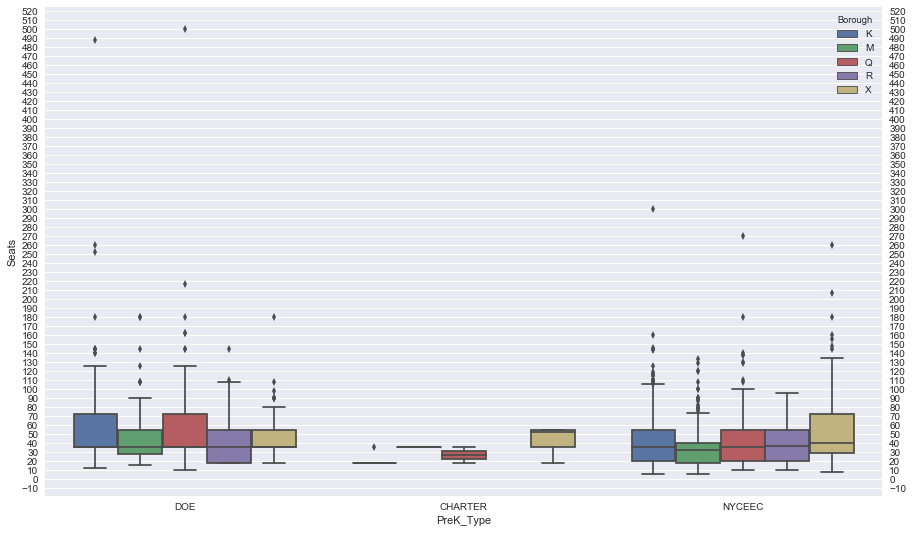

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import seaborn as sns
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(15,9))
sns.boxplot(x="PreK_Type", y="Seats", hue="Borough", data=u_pk)
ax.yaxis.set_major_locator(MultipleLocator(10.000))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both',left=True, right=True, labeltop=False, labelright=True)

Well it looks like those two data points are, in fact, pretty extreme outliers as compared to the rest of our data. <br>
Let's take a look at those entries, then:

In [31]:
u_pk[u_pk["Seats"]>300]

,LOCCODE,PreK_Type,Borough,LocName,NOTE,phone,address,Postcode,Day_Length,Seats,...,EXTENDED_DAY,SEMS_CODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
158,K280,DOE,K,Pre - K Center At Bishop Ford School Site,NaN,718-965-1190,500 19th St,11215,1,488,...,1,15K863,40.656944,-73.983115,7,38,1502,3017307.0,3.008890e+09,Windsor Terrace ...
1878,Z079,DOE,Q,Pre - K Center At P.S. 315,NaN,212-637-8000,43 - 18 97th Pl,11101,1,500,...,3,24Z079,40.746009,-73.866357,4,21,409,NaN,NaN,North Corona ...


At this point, there are two possibilities: <br>
1) These are just legitimately large PreK for All locations, or <br>
2) An error was made when inputting the data. <br>

A little detective work seems in order. <br>
A simple Google search (https://www.dnainfo.com/new-york/20150625/park-slope/what-you-need-know-about-citys-standalone-pre-k-centers/) reveals that our entry # 158, Pre-K Center at Bishop Ford School Site is indeed a very large PreK facility. This is also corroborated in the NYC PreK for All website's directory: <br>
(https://www.schools.nyc.gov/docs/default-source/default-document-library/nyc-pre-kindergarten-directory-brooklyn) <br>
So that data point can stay (for now). <br>

However, the same style of research turned up no information on our other outlier--the Pre-K Center at P.S. 315.<br>
No such facility is to be found in the directory(https://www.schools.nyc.gov/docs/default-source/default-document-library/2018nycprekdirectoryqueens-english).<br>
And a google search of the address (https://www.google.com/search?q=43+-+18+97th+Pl&oq=43+-+18+97th+Pl&aqs=chrome..69i57j0l2.732j0j7&sourceid=chrome&ie=UTF-8) turns up several results, but none which corroborate that this is a PreK for All location.<br>

While I can't say for sure what is going on with this entry, I think it is safe to say it seems problematic for the purposes of our data exploration. You know what that means...<br>

#### It's gotta go!

In [32]:
u_pk = u_pk.drop([1878])

Let's double check...

In [33]:
u_pk[u_pk["Seats"]>300]

,LOCCODE,PreK_Type,Borough,LocName,NOTE,phone,address,Postcode,Day_Length,Seats,...,EXTENDED_DAY,SEMS_CODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
158,K280,DOE,K,Pre - K Center At Bishop Ford School Site,NaN,718-965-1190,500 19th St,11215,1,488,...,1,15K863,40.656944,-73.983115,7,38,1502,3017307.0,3.008890e+09,Windsor Terrace ...


In [34]:
u_pk.describe()

,Postcode,Day_Length,Seats,X,Y,MEALS,INDOOR_OUTDOOR,EXTENDED_DAY,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,1884.000000,1884.000000,1884.00000,1.884000e+03,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1.709000e+03,1.710000e+03
mean,10889.415605,1.118365,45.84448,1.006458e+06,202282.557325,3.550425,5.378450,2.127389,40.721898,-73.919701,7.751062,27.105626,7717.891189,2.936632e+06,2.844937e+09
std,517.694259,0.504154,32.53254,2.431590e+04,31685.371128,1.529704,2.640745,0.927375,0.086973,0.087836,4.971306,14.337077,22702.502109,1.181621e+06,1.145241e+09
min,10001.000000,1.000000,6.00000,9.157910e+05,124757.000000,1.000000,1.000000,1.000000,40.508809,-74.246427,1.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,10455.000000,1.000000,21.00000,9.943190e+05,178340.250000,2.000000,3.000000,1.000000,40.656034,-73.963579,3.000000,15.000000,185.000000,2.026706e+06,2.030245e+09
50%,11208.000000,1.000000,36.00000,1.005732e+06,198583.000000,3.000000,6.000000,3.000000,40.711788,-73.922329,7.000000,27.000000,381.000000,3.097973e+06,3.032185e+09
75%,11237.000000,1.000000,54.00000,1.020886e+06,229519.250000,5.000000,8.000000,3.000000,40.796839,-73.867207,12.000000,39.000000,918.000000,4.012089e+06,4.006875e+09
max,11697.000000,5.000000,488.00000,1.064960e+06,270141.000000,9.000000,9.000000,3.000000,40.908305,-73.709198,83.000000,51.000000,157903.000000,5.167549e+06,5.079140e+09


We see now we have 1884 entries instead of 1885, because we dropped our problematic entry (1878). <br>

With our data cleaned up, let's move onto:

### Data Analysis <br>

We're going to start by comparing the distributions of PreK for All locations and Non-Public PreK locations.<br>
A reminder of what we're looking for here:<br>
1)How these two distributions compare,<br>
2)if either of them gravitate toward specific geographic areas (i.e. Boroughs, neighborhoods),<br>
3)if there any areas where these distributions have significant overlap, or<br>
4)can we link either distribution to economic or demographic data.<br> 

First, let's see the count of locations broken down by Borough.

In [35]:
u_pk['Borough'].value_counts()

K    633
Q    506
X    355
M    272
R    118
Name: Borough, dtype: int64

In [36]:
p_pk['Borough'].value_counts()

M    217
K    120
Q     60
X     21
R     17
Name: Borough, dtype: int64

And let's see how these numbers look next to each other:

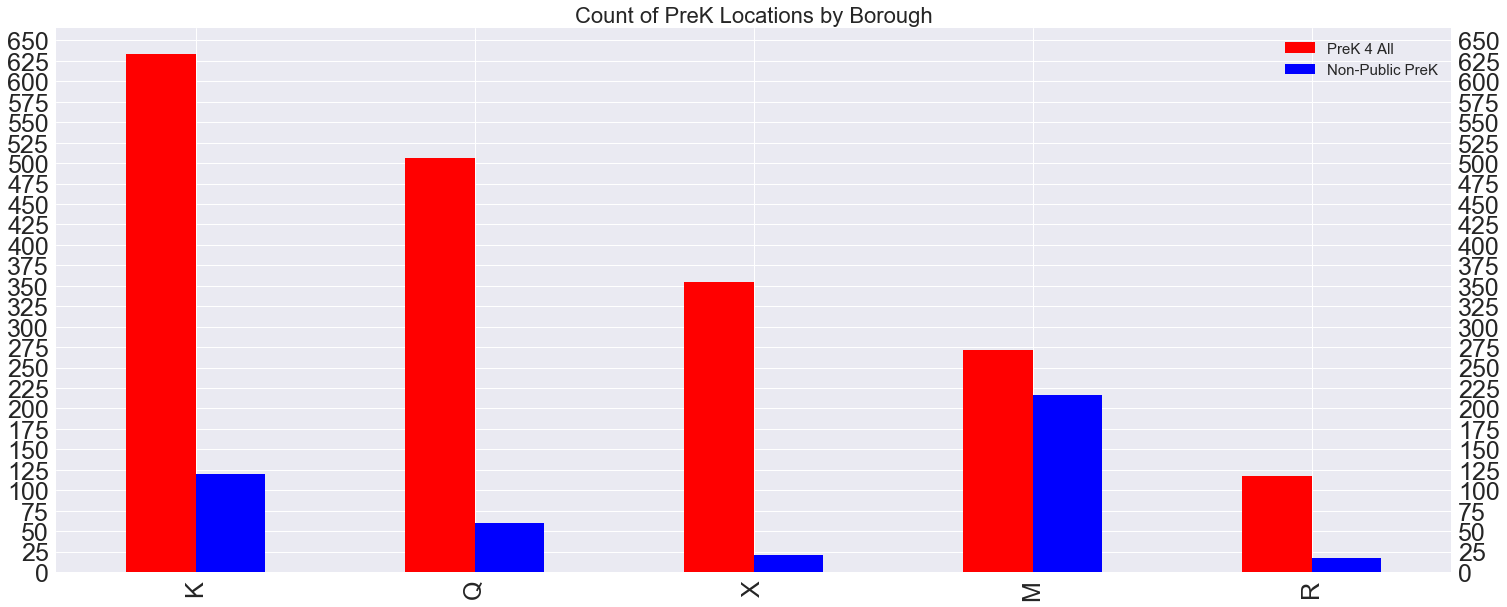

In [37]:
graph_pk = u_pk['Borough'].value_counts().rename('PK4A').to_frame()\
               .join(p_pk['Borough'].value_counts().rename('NPPK').to_frame())
my_colors = list(['r', 'b'])

ax = graph_pk.plot(kind='bar', figsize=(25,10), color=my_colors)
ax.set_title('Count of PreK Locations by Borough', fontsize=22)
ax.yaxis.set_major_locator(MultipleLocator(25.000))
ax.tick_params(labelsize=25.0, which='both',left=True, right=True, labeltop=False, labelbottom=True, labelright=True)
ax.legend(labels = ['PreK 4 All', 'Non-Public PreK'], fontsize = 15)

plt.show()

It is clear that the greatest area of overlap between PreK for All locations and Non-Public PreK locations is in Manhattan (272 to 217). No other borough has comparable numbers.<br>

The borough with the second largest number of Non-Public PreK locations is Brooklyn. While the number is not significant as compared to the number of PreK for All locations, it still has around one quarter of all the Non-Public PreK locations in our dataframe--which, I think, is significant.<br>

To gain more insight into these distributions, let's break up our dataframes by borough and then compare the numbers for each Postcode visually. That should provide a more granular look at areas of overlap between our two categories of PreK locations.

In [38]:
brooklyn = u_pk[u_pk['Borough']=='K']
queens = u_pk[u_pk['Borough']=='Q']
bronx = u_pk[u_pk['Borough']=='X']
manhattan = u_pk[u_pk['Borough']=='M']
staten_island = u_pk[u_pk['Borough']=='R']

In [39]:
p_brooklyn = p_pk[p_pk['Borough']=='K']
p_queens = p_pk[p_pk['Borough']=='Q']
p_bronx = p_pk[p_pk['Borough']=='X']
p_manhattan = p_pk[p_pk['Borough']=='M']
p_staten_island = p_pk[p_pk['Borough']=='R']


#### Brooklyn

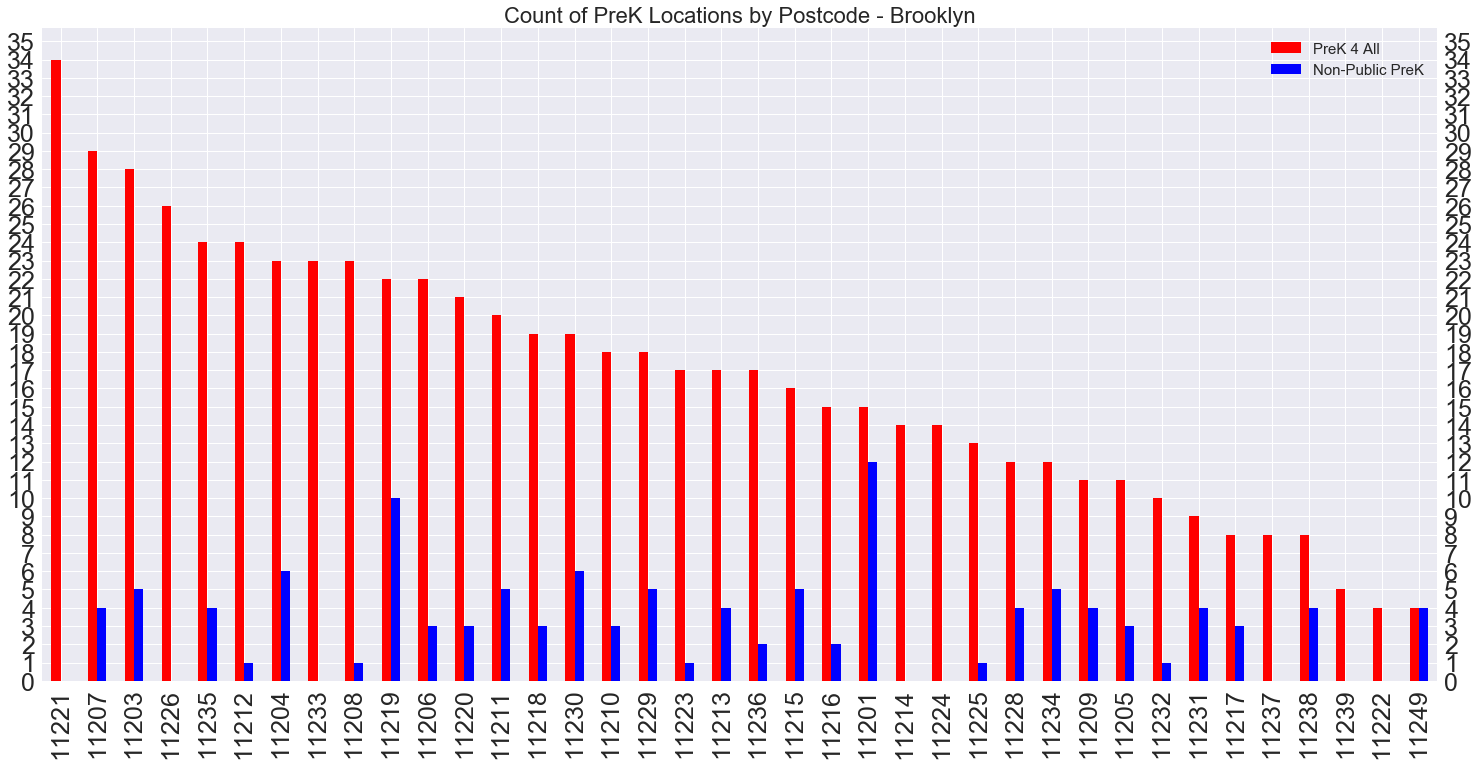

In [40]:
graph_bk = brooklyn['Postcode'].value_counts().rename('PK4A').to_frame()\
               .join(p_brooklyn['Postcode'].value_counts().rename('NPPK').to_frame())

ax = graph_bk.plot(kind='bar', figsize=(25,12), color=my_colors)
ax.set_title('Count of PreK Locations by Postcode - Brooklyn', fontsize=22)
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.tick_params(labelsize=25.0, which='both',left=True, right=True, labeltop=False, labelbottom=True, labelright=True)
ax.legend(labels = ['PreK 4 All', 'Non-Public PreK'], fontsize = 15)

plt.show()

It appears we have two postcodes with a notable amount more Non-Public PreK locations: <br>
11201 5:4 ratio, 27 locations total (15 PK4A;12 NPPK)<br>
11219 11:5 ratio, 32 locations total (22 PK4A;10 NPPK)<br>

All of the other postcodes fall into the same range of Non-Public PreK (0-6). This seems to indicate that aside from our two area above (11201, 11219), Non-Public PreK programs are relatively evenly spread out across Brooklyn.<br>

The data tells us something else I think is important when thinking about the goals of the PreK for All initiative, namely, to make early childhood education more accessible to families in NYC:<br>
The postcode with the greatest number of PreK for All locations has NO Non-Public PreK locations.<br>
Going one step further, among the Top 10 postcodes with the greatest amount of PreK for All locations, only one (#10, 11219) has a notable number Non-Public PreK locations (10 out of 32, or 31.25% of total locations).<br>

Let's take a look at the income data for these postcodes to see if there is a connection.<br>
To make it easier, I'll load an income dataframe with just the postcodes associated with Brooklyn:

In [41]:
bk_income = pd.read_csv('Brooklyn Mean Household Income Postcode.csv')

bk_income.head()

,Postcode,Mean income (dollars),Total households
0,11221,59842,29570
1,11203,60740,27479
2,11207,50551,32120
3,11212,42138,31587
4,11226,62046,36399


Let's set our index as Postcode:

In [42]:
bk_income = bk_income.set_index('Postcode')

In [43]:
bk_income.describe()

,Mean income (dollars),Total households
count,37.000000,37.000000
mean,76426.567568,25373.054054
std,29046.042084,7371.624112
min,35611.000000,6456.000000
25%,57349.000000,22251.000000
50%,69630.000000,27373.000000
75%,88523.000000,30668.000000
max,161739.000000,38049.000000


And let's visualize it:

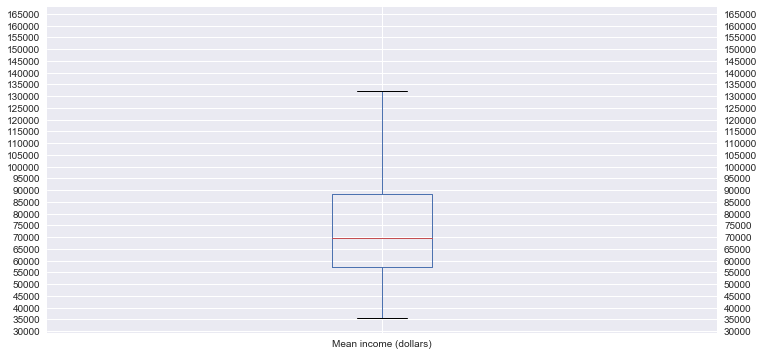

In [44]:
fig,ax = plt.subplots(figsize=(12,6))

ax = bk_income.boxplot(column='Mean income (dollars)')
ax.yaxis.set_major_locator(MultipleLocator(5000.000))
ax.tick_params(left=True, right=True, labeltop=False, labelbottom=True, labelright=True)

plt.show()

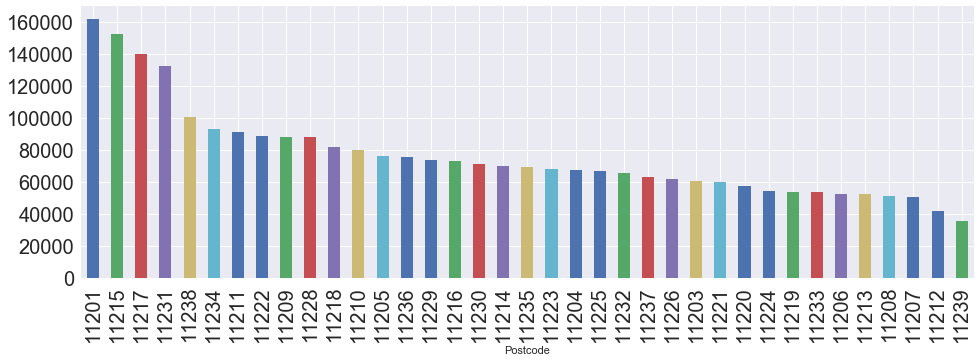

In [45]:
bk_income['Mean income (dollars)'].sort_values(ascending=False).plot(kind='bar',figsize=(16,5), fontsize=20)
plt.show()

Postcode 11201, with the highest amount of Non-Public PreK locations, also has the highest mean income.<br>

Postcode 11219, however, has one of the lowest mean incomes. There must be another reason for the notable number of Non-Public PreK locations. Let's look at the entries:

In [46]:
p_brooklyn[p_brooklyn['Postcode']==11219]

,Row Number,School Name,Borough,Address,Postcode,Lat,Long,Neighborhood,Ages,Website
19,20,Bais Esther School,K,"1353 50th St, Brooklyn, NY",11219,40.633743,-73.991255,Borough Park,PreK - Grade 12,NaN
20,21,Bais Frima Chinuch Center,K,"1377 42 STREET, Brooklyn, NY",11219,40.637862,-73.985964,Kensington,2 - 5 years,NaN
26,27,Bais Yitzchak Yeshiva,K,"1413 45th St, Brooklyn, NY",11219,40.635816,-73.987009,Borough Park,PreK - Grade 12,NaN
48,49,Bnos Margulia Viznitz,K,"4022 New Utrecht Ave, Brooklyn, NY",11219,40.643912,-73.994316,Borough Park,PreK - Grade 12,https://www.niche.com/k12/bnos-margulia-viznit...
51,52,Bnos Zion of Bobov,K,"5000 14th Ave, Brooklyn, NY",11219,40.633097,-73.990946,Borough Park,PreK - Grade 12,https://www.niche.com/k12/bnos-zion-of-bobov-b...
116,117,Tiferes Bnos/Cong Ahavaz Shulem Nadverna,K,"826 Myrtle Ave, Brooklyn, NY",11219,40.695291,-73.948886,Bushwick,PreK - Grade 12,https://www.niche.com/k12/tiferes-bnos-cong-ah...
124,125,Darkei Chaim,K,"1270 52nd St, Brooklyn, NY",11219,40.633477,-73.994515,Borough Park,PreK-Grade 4,https://www.niche.com/k12/darkei-chaim-brookly...
202,203,Kollel Zichron Yosef Preschool,K,"1358 56th St, Brooklyn, NY",11219,40.630154,-73.995185,Borough Park,2 - 5 years,NaN
381,383,Talmud Torah Ohel Yochanan,K,"1460 56th St, Brooklyn, NY",11219,40.628725,-73.992713,Borough Park,Pre K - Grade 8,https://www.niche.com/k12/talmud-torah-ohel-yo...
431,433,Yeshiva Toldos Yesuscher,K,"1531 63 STREET, BROOKLYN, NY",11219,40.624133,-73.994926,Mapleton,2 - 5 years,https://a816-healthpsi.nyc.gov/ChildCare/WDeta...


And indeed, there is another reason: these locations all appear religiously-affiliated (Hasidic Jewish).

So we have seen that the postcode with the most Non-Public PreK locations also had the highest mean income.<br>
But what about the postcodes with the most PreK for All locations? What relationship do they have to mean income?<br>

Let's look at the top 5.

In [47]:
bk_income.loc[[11221, 11207, 11203, 11226, 11235]]

,Mean income (dollars),Total households
Postcode,,
11221,59842,29570
11207,50551,32120
11203,60740,27479
11226,62046,36399
11235,69630,32421


In [48]:
bk_income.mean(axis=0)

Mean income (dollars)    76426.567568
Total households         25373.054054
dtype: float64

It does seem that there is a connection here:<br>
All of these postcodes' mean incomes are in the bottom 50% of the distribution (#5, 11235, is actually the median of our data).<br>
As an added bonus, we also see that their Total Households counts are all above average as well.<br>

Let's take a look at the relationship between Income and Household:

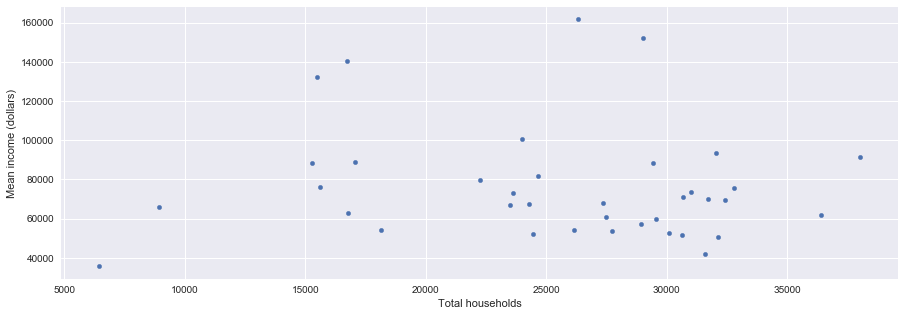

In [49]:
ax = bk_income.plot.scatter(x='Total households' ,
                             y='Mean income (dollars)',
                             figsize=(15,5))

We can see that a notable cluster of Brooklyn postcodes have high Total Household counts and low Mean Income.

With this information in hand, let us consider:<br>

An important goal of the NYC PreK for All initiative is to make early childhood education more accessible to New Yorkers. Does our data support success in this goal in Brooklyn?<br>

Yes, it would seem that in Brooklyn, at least, the areas with the the highest concentration of PreK for All locations have more total households than average, and have lower than average mean incomes--hence less expendable income to spend on childcare/early childhood education.<br>

What about the other boroughs, though?

#### Queens

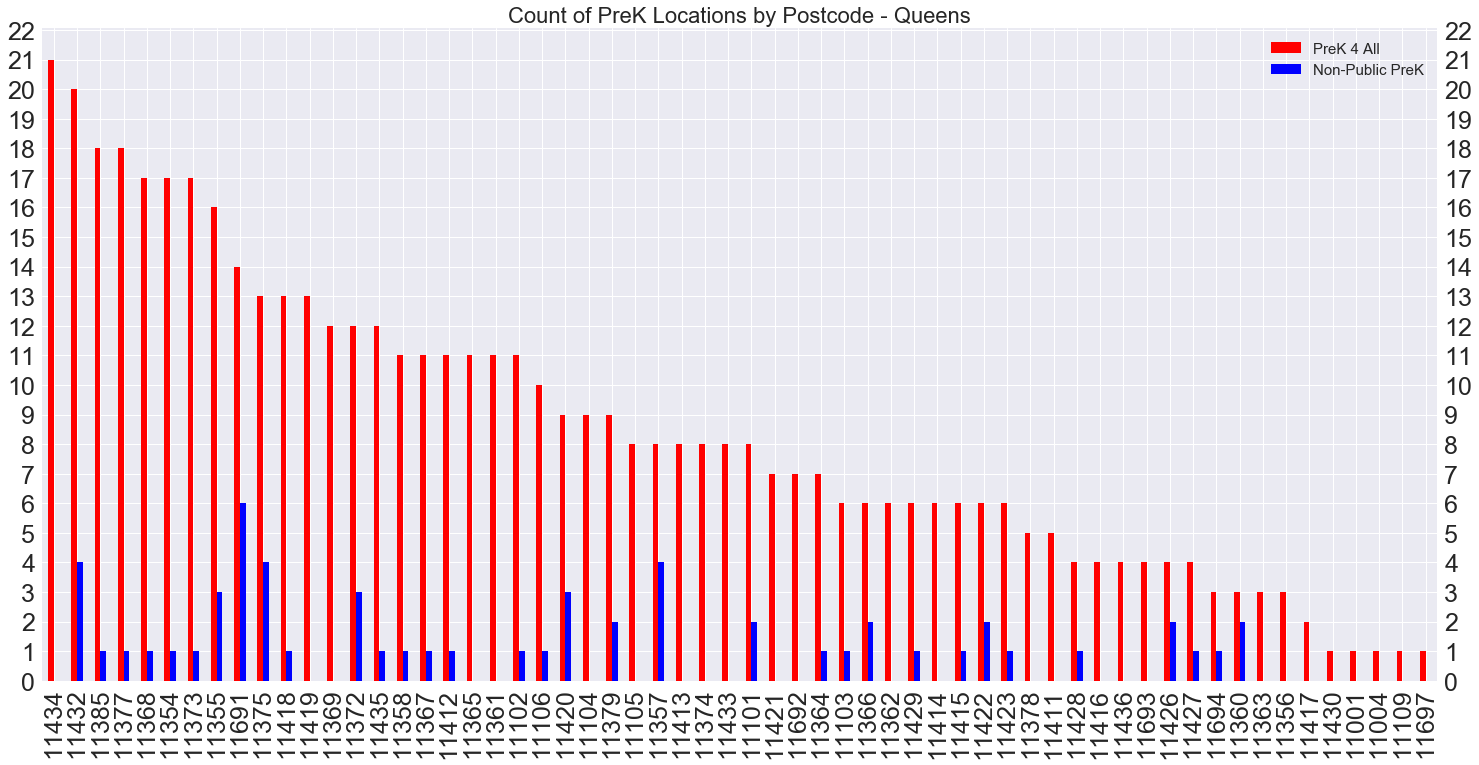

In [50]:
graph_qu = queens['Postcode'].value_counts().rename('PK4A').to_frame()\
               .join(p_queens['Postcode'].value_counts().rename('NPPK').to_frame())

ax = graph_qu.plot(kind='bar', figsize=(25,12), color=my_colors)
ax.set_title('Count of PreK Locations by Postcode - Queens', fontsize=22)
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.tick_params(labelsize=25.0, which='both',left=True, right=True, labeltop=False, labelbottom=True, labelright=True)
ax.legend(labels = ['PreK 4 All', 'Non-Public PreK'], fontsize = 15)

plt.show()

At first glance, there do not appear to be any postcodes in Queens which have a notably greater amount of Non-Public PreK locations--most fall within a range of 0-4.<br>
We have one "outlier" here (11691, 6).<br>

Let's take a look at our income data to see if there's some connection.

In [51]:
q_income = pd.read_csv('Queens Median Household Income Postcode.csv')

In [52]:
q_income = q_income.set_index('Postcode')

In [53]:
q_income.describe()

,Mean income (dollars),Total households
count,58.000000,58.000000
mean,82889.672414,13358.534483
std,17693.093340,7720.745697
min,54563.000000,2649.000000
25%,73361.750000,7699.250000
50%,80436.000000,11767.000000
75%,92178.250000,16204.000000
max,160515.000000,34919.000000


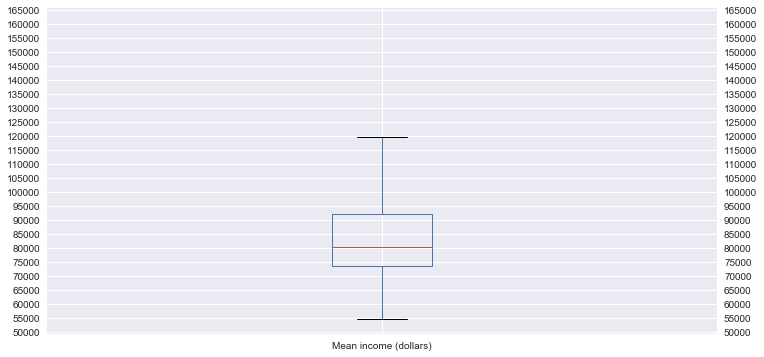

In [54]:
fig,ax = plt.subplots(figsize=(12,6))

ax = q_income.boxplot(column='Mean income (dollars)')
ax.yaxis.set_major_locator(MultipleLocator(5000.000))
ax.tick_params(left=True, right=True, labeltop=False, labelbottom=True, labelright=True)

plt.show()

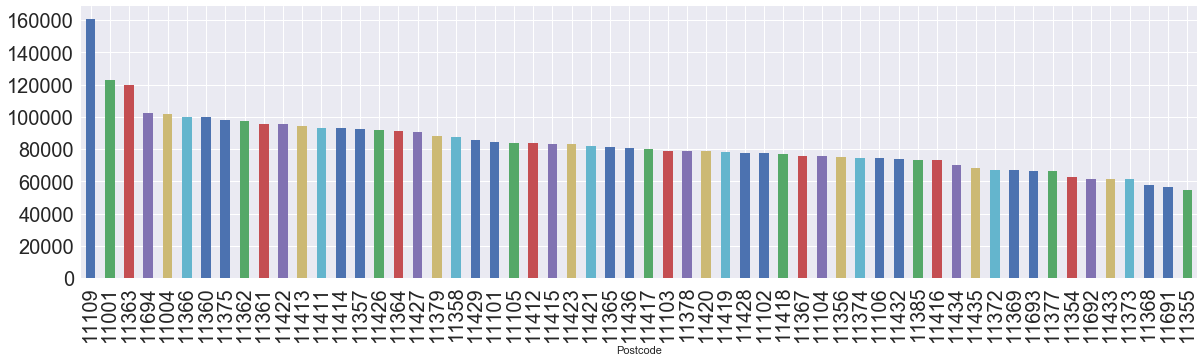

In [55]:
q_income['Mean income (dollars)'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5), fontsize=20)
plt.show()

What we find is interesting: this postcode has the second-lowest mean income.<br>

In [56]:
q_income.loc[11691]

Mean income (dollars)    56524
Total households         19869
Name: 11691, dtype: int64

This is a fair amount below the lower quartile of the distribution (70,080).<br>

So now let's look at the entries:

In [57]:
p_queens[p_queens['Postcode']==[11691]]

,Row Number,School Name,Borough,Address,Postcode,Lat,Long,Neighborhood,Ages,Website
23,24,BAIS YAAKOV ATERES MIRIAM,Q,"1214 Heyson Rd, Far Rockaway, NY",11691,40.596382,-73.746774,Far Rockaway,PreK - Grade 3,http://www.baisyaakovam.org/
47,48,BNOS BAIS YAAKOV OF FAR ROCKAWAY,Q,"613 Beach 9th St, Far Rockaway, NY",11691,40.601343,-73.745313,Far Rockaway,PreK - Grade 12,https://www.bbyschool.org/
382,384,TALMUD TORAH SIACH YITZCHOK,Q,"1513 Central Ave, Far Rockaway, NY",11691,40.605468,-73.751198,Far Rockaway,PreK - Grade 8,https://siachyitzchok.org/
392,394,TORAH ACADEMY FOR GIRLS,Q,"444 Beach 6th St, Far Rockaway, NY",11691,40.599250,-73.739969,Far Rockaway,PreK - Grade 12,https://www.niche.com/k12/torah-academy-for-gi...
397,399,WORLD HARVEST DELIVERANCE CENTER,Q,"1521 Central Ave, Far Rockaway, NY",11691,40.605291,-73.751406,Far Rockaway,PreK - Grade 5,https://www.facebook.com/pages/World-Harvest-D...
419,421,YESHIVA DARCHEI TORAH,Q,"257 Beach 17 St, Far Rockaway, NY",11691,40.596884,-73.751601,Far Rockaway,PreK - Grade 12,www.darchei.org/


And much like our peculiar Brooklyn postcode (11219), the locations in this postcode are once again religiously-affiliated (5 out of the 6 are Hasidic Jewish).<br>

Let's turn to the postcodes with the highest amount of PreK for All locations (17+).

In [58]:
q_income.loc[[11434,11432,11385,11377,11368,11354,11373]]

,Mean income (dollars),Total households
Postcode,,
11434,70080,20968
11432,73715,18487
11385,73244,34919
11377,66425,31603
11368,57738,28773
11354,62668,20414
11373,61210,30989


In [59]:
q_income.describe()

,Mean income (dollars),Total households
count,58.000000,58.000000
mean,82889.672414,13358.534483
std,17693.093340,7720.745697
min,54563.000000,2649.000000
25%,73361.750000,7699.250000
50%,80436.000000,11767.000000
75%,92178.250000,16204.000000
max,160515.000000,34919.000000


All of these postcodes are in the bottom half of the mean income distribution (<80,436), and all but one of them (11432) fall into the bottom 25% of the mean income distribution (<73,361). <br>

Summary of Insights
For Non-Public PreK locations:<br>
1)There is not a significant number of these locations in Queens,<br>
2)These locations are distributed with no notable preference for specific postcodes, aside from one postcode where<br>
3)The above average number of locations are associated with religious affiliation, and finally <br>
4)The postcodes with the highest mean incomes were not associated with a greater number of Non-Public PreK locations.<br>

Insight 3, alongside a similar case in Brooklyn, may point toward a possible trend: 
Areas with relatively-low mean income but with a relatively-high number of Non-Public PreK locations may be connected to religiously-affiliated communities, <br>


As for the distribution of PreK for All locations, much like in Brooklyn, the areas with the highest concentrations of locations were areas with low mean incomes. <br>

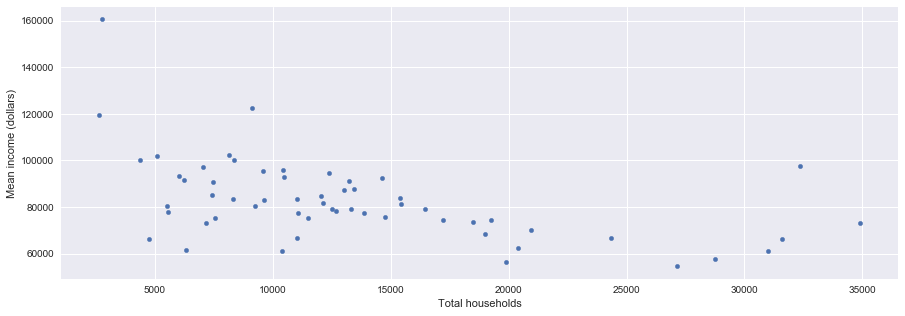

In [60]:
ax = q_income.plot.scatter(x='Total households' ,
                             y='Mean income (dollars)',
                             figsize=(15,5))

#### Bronx

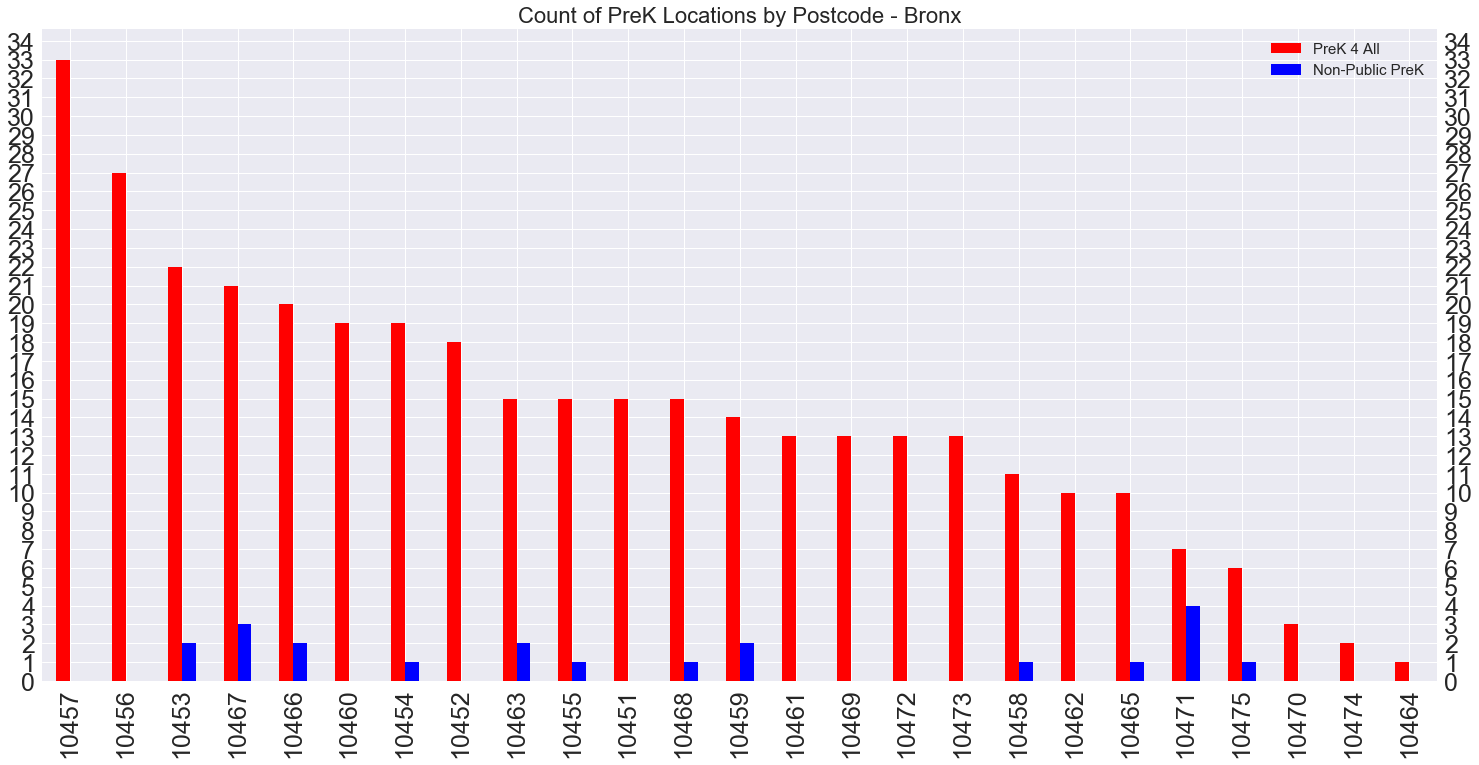

In [61]:
graph_bx = bronx['Postcode'].value_counts().rename('PK4A').to_frame()\
               .join(p_bronx['Postcode'].value_counts().rename('NPPK').to_frame())

ax = graph_bx.plot(kind='bar', figsize=(25,12), color=my_colors)
ax.set_title('Count of PreK Locations by Postcode - Bronx', fontsize=22)
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.tick_params(labelsize=25.0, which='both',left=True, right=True, labeltop=False, labelbottom=True, labelright=True)
ax.legend(labels = ['PreK 4 All', 'Non-Public PreK'], fontsize = 15)

plt.show()

Though apparent in the inital visualization of PreK locations by Borough, this graph really highlights just how few Non-Public PreK locations are in the Bronx--especially in comparison to the number of PreK for All locations.<br>

However, there is one postcode which stands out: 10471 (4 Non-Public out of 11 total, 36.3%). Let's investigate.

In [62]:
bx_income = pd.read_csv('Bronx Mean Household Income Postcode.csv')

In [63]:
bx_income = bx_income.set_index('Postcode')

In [64]:
bx_income.describe()

,Mean income (dollars),Total households
count,25.000000,25.000000
mean,54530.040000,19769.120000
std,20951.716255,8531.142232
min,33449.000000,1890.000000
25%,38071.000000,15647.000000
50%,45872.000000,20906.000000
75%,71240.000000,25765.000000
max,109107.000000,35860.000000


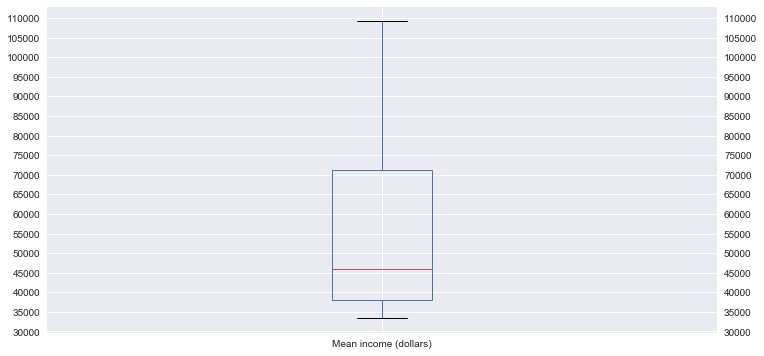

In [65]:
fig,ax = plt.subplots(figsize=(12,6))

ax = bx_income.boxplot(column='Mean income (dollars)')
ax.yaxis.set_major_locator(MultipleLocator(5000.000))
ax.tick_params(left=True, right=True, labeltop=False, labelbottom=True, labelright=True)

plt.show()

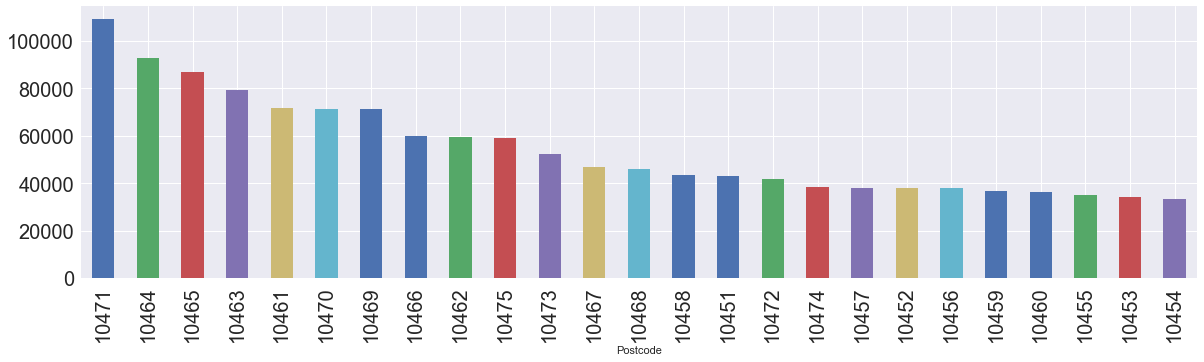

In [66]:
bx_income['Mean income (dollars)'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5), fontsize=20)
plt.show()

And in this case we can see that postcode 10471 is associated with the highest mean income in the Bronx. This is similar to Brooklyn, where the postcode with the highest mean income also had the most Non-Public PreK locations.<br>

These graphs also help us to see:<br>
1)The postcode with the least amount of PreK for All locations (10464; 1) has the second-highest mean income (92,724),

In [67]:
bx_income.loc[10464]

Mean income (dollars)    92724
Total households          1890
Name: 10464, dtype: int64

2)Of the five postcodes with highest number of PreK for All locations (20+), three have mean incomes below the median (45,872) and two are in the bottom quartile (<38,071):

In [68]:
bx_income.loc[[10457, 10456, 10453, 10467, 10466]]

,Mean income (dollars),Total households
Postcode,,
10457,38182,24089
10456,37878,29771
10453,34188,27240
10467,46982,35860
10466,60066,23056


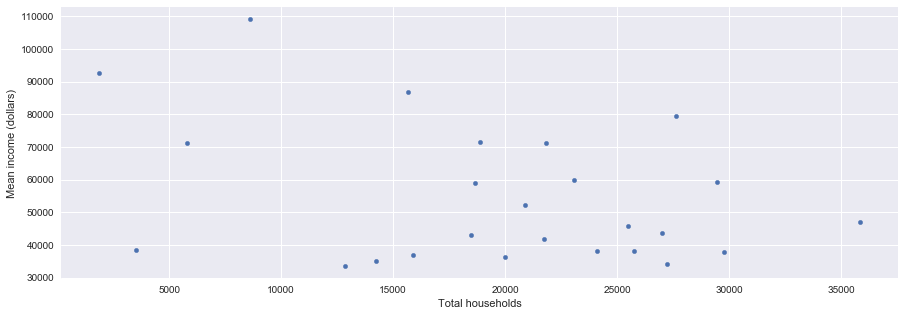

In [69]:
ax = bx_income.plot.scatter(x='Total households' ,
                             y='Mean income (dollars)',
                             figsize=(15,5))

This all indicates:<br>
1)a significant LACK of overlap between PreK for All and Non-Public PreK locations in the Bronx, <br>2)a connection between above average mean income and prevalence of Non-Public PreK locations, and<br>
3)a connection between below average mean income and prevalence of PreK for All locations.<br>


Let's move to the NYC borough where the overlap of our two types of PreK locations is the greatest:

#### Manhattan

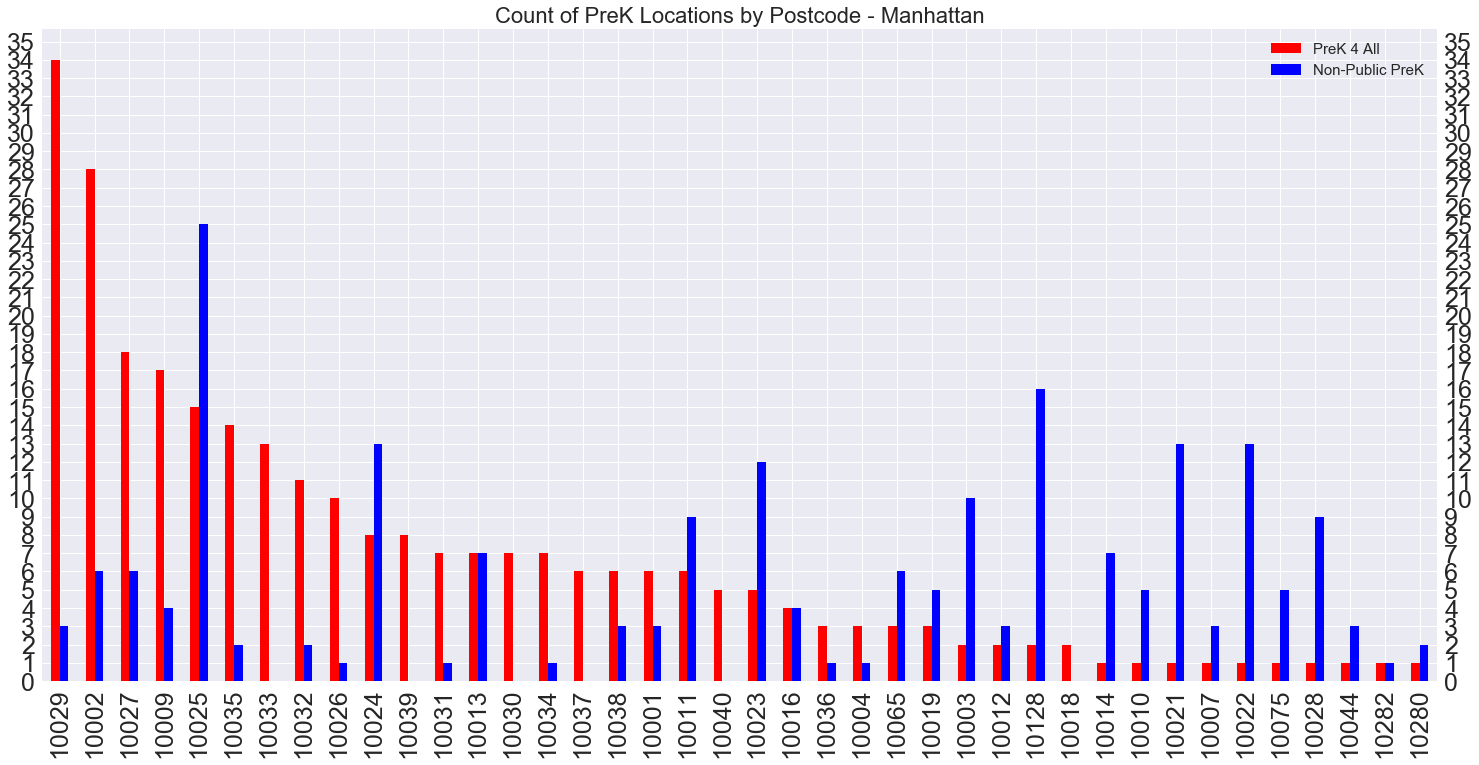

In [70]:
graph_ny = manhattan['Postcode'].value_counts().rename('PK4A').to_frame()\
               .join(p_manhattan['Postcode'].value_counts().rename('NPPK').to_frame())

ax = graph_ny.plot(kind='bar', figsize=(25,12), color=my_colors)
ax.set_title('Count of PreK Locations by Postcode - Manhattan', fontsize=22)
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.tick_params(labelsize=25.0, which='both',left=True, right=True, labeltop=False, labelbottom=True, labelright=True)
ax.legend(labels = ['PreK 4 All', 'Non-Public PreK'], fontsize = 15)

plt.show()

The differences between Manhattan and the other Boroughs we have explored (Brooklyn, Queens, Bronx) are obvious.<br>

Here we find the only postcodes in NYC (so far) where the number of Non-Public PreK locations are greater than (or even equal to) the number of PreK for All locations.<br>
In fact, they represent over half (21 out of 40) of the Manhattan postcodes in our data! <br>

We can also observe that Manhattan postcodes have, in general, fewer PreK for All locations as compared to Brooklyn, Queens and the Bronx.<br>

Let's take a look at income data:

In [71]:
m_income = pd.read_csv('Manhattan Mean Household Income Postcode.csv')

In [72]:
m_income = m_income.set_index('Postcode')

In [73]:
m_income.describe()

,Mean income (dollars),Total households
count,40.000000,40.000000
mean,145829.450000,18260.950000
std,77470.658566,9951.627379
min,47836.000000,1592.000000
25%,65831.000000,11920.000000
50%,148772.000000,16277.000000
75%,199253.000000,26192.250000
max,392959.000000,42783.000000


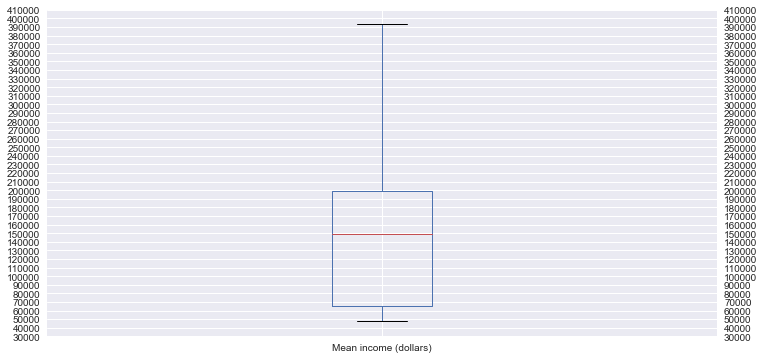

In [74]:
fig,ax = plt.subplots(figsize=(12,6))

ax = m_income.boxplot(column='Mean income (dollars)')
ax.yaxis.set_major_locator(MultipleLocator(10000.000))
ax.tick_params(left=True, right=True, labeltop=False, labelbottom=True, labelright=True)

plt.show()

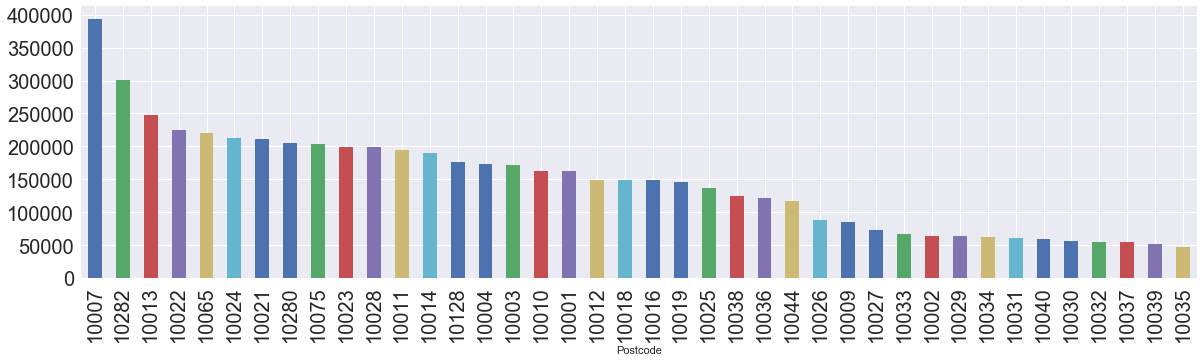

In [75]:
m_income['Mean income (dollars)'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5), fontsize=20)
plt.show()

It is clear that Manhattan's differences extend to the distribution of its mean incomes. <br>
In short, Manhattan households have WAY higher income. <br>
It should come as no surprise that higher mean income is associated with a greater number of Non-Public PreK locations, considering that was a trend we witnesed in Brooklyn and the Bronx.<br>

What is ineresting here, though, is that the postcode with the highest mean income (10007) is not the postcode with the greatest number of Non-Public PreK locations. Instead, that is postcode 10025.

In [76]:
graph_ny.loc[10007]

PK4A    1.0
NPPK    3.0
Name: 10007, dtype: float64

In [77]:
m_income.loc[10007]

Mean income (dollars)    392959
Total households           2743
Name: 10007, dtype: int64

In [78]:
graph_ny.loc[10025]

PK4A    15.0
NPPK    25.0
Name: 10025, dtype: float64

In [79]:
m_income.loc[10025]

Mean income (dollars)    136293
Total households          42783
Name: 10025, dtype: int64

10025 actually has a mean income that is below average for Manhattan (136,293 vs 145,829.45).<br>

What about the other postcodes with high numbers of Non-Public PreK locations (12+)?

In [80]:
m_income.loc[[10021,10022,10023,10024,10128]]

,Mean income (dollars),Total households
Postcode,,
10021,211624,24558
10022,224771,17619
10023,199343,33144
10024,212125,28809
10128,176063,32151


It turns out, these postcodes' mean incomes are all above the average (>145,829.45). Four out of these five even have mean incomes in the top quartile (>199,253).<br>

So what is going on with 10025?<br>
Well, we've seen postcodes with unexpectedly high numbers of Non-Public PreK locations for their mean income before, in Brooklyn and Queens. They had a connection to religious affiliation. <br>

Perhaps that is the case with 10025?

In [81]:
p_manhattan[p_manhattan['Postcode']==[10025]]

,Row Number,School Name,Borough,Address,Postcode,Lat,Long,Neighborhood,Ages,Website
7,8,ADULTS AND CHILDREN IN TRUST (A.C.T.) PROGRAMS...,M,"1047 Amsterdam Ave, New York NY",10025,40.803821,-73.961836,Upper West Side,1 - 5 years,http://actprograms.org
10,11,Alexander Robertson School,M,"3 West 95th Street, New York NY",10025,40.791209,-73.965389,Upper West Side,3 years- Grade 5,http://alexanderrobertson.org
27,28,Bank Street College School for Children,M,"610 West 112th Street, New York NY",10025,40.805579,-73.966611,Morningside Heights,Nursery-Grade 8,https://school.bankstreet.edu/programs/lower-s...
30,31,Basic Trust,M,"127 West 94th St., New York NY",10025,40.792209,-73.969421,Upper West Side,3 months-5 years,http://www.basictrust.org/
32,33,Basis Independent Manhattan,M,"795 Columbus Avenue, New York, NY",10025,40.794446,-73.965877,Upper West Side,3 - 5 years,https://manhattan.basisindependent.com/program...
46,47,Bloomingdale Family Program,M,"125 West 109th Street, New York NY",10025,40.802049,-73.962938,Upper West Side,3-4 years,https://bloomingdalefamilyprogram.org/
67,68,Bright Horizons at W 96th Street,M,"103 W 96th St, New York NY",10025,40.793268,-73.967935,Upper West Side,Infants-PreK,https://child-care-preschool.brighthorizons.co...
73,74,Broadway Presbyterian Church Nursery School,M,"601 West 114th St., New York NY",10025,40.807042,-73.965134,Morningside Heights,2 - 5 years,http://greatlittleschool.com
97,98,Chabad Early Learning Center,M,"166 West 97th Street, New York NY",10025,40.794317,-73.969349,Upper West Side,2 - 5 years,https://www.chabadelc.com/
112,113,Columbia Grammar and Prep School,M,"5 West 93rd Street, New York NY",10025,40.790180,-73.966795,Upper West Side,PreK-Grade 12,http://cgps.org/


That doesn't appear to be the case here. Is 10025 just an anomoly that we cannot account for?<br>

Thankfully, no.<br> If we take a closer look at both it and at the other Manhattan postcodes with high numbers of Non-Public PreK locations, we can see they are connected by something else:

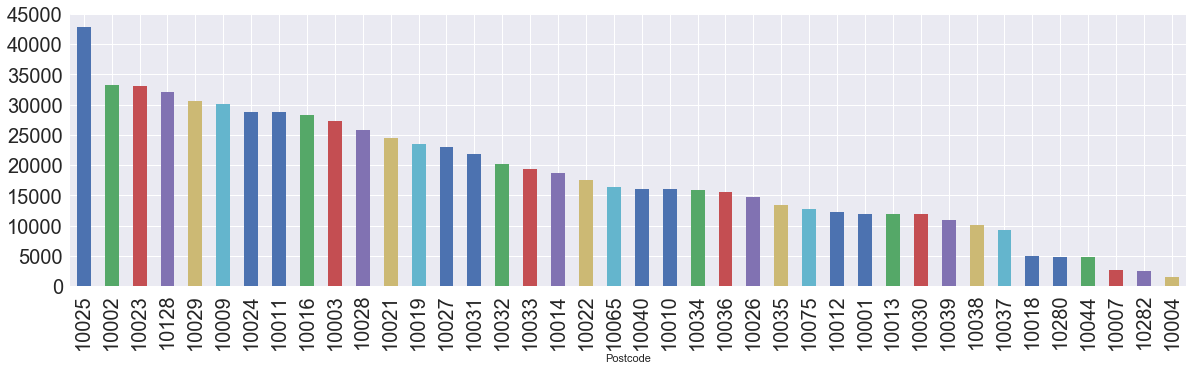

In [82]:
m_income['Total households'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5), fontsize=20)
plt.show()

All of these postcodes have above average Total Household counts(>16,277). 10025 has the greatest amount in Manhattan (42,783).<br>

This data provides the insights that:<br>
1)the notable prevalence of Non-Public PreK locations in Manhattan over other boroughs is connected to overall higher mean incomes than other boroughs, and <br>
2)these Manhattan locations are distrubted most densely in areas with the most households, but not neessarily with the highest mean incomes in Manhattan.<br>

From a business interest standpoint, it would make sense that tuition-based locations would want to be situated in higher-cinome areas that are relatively well-populated--wouldn't it?

Let's turn our focus to the Manhattan postcodes with the most PreK for All locations to see if we can find a trend in the data: 

In [83]:
graph_ny.head(4)

,PK4A,NPPK
10029,34,3.0
10002,28,6.0
10027,18,6.0
10009,17,4.0


In [84]:
m_income.loc[[10029,10002,10027,10009]]

,Mean income (dollars),Total households
Postcode,,
10029,63840,30640
10002,64196,33327
10027,73563,22933
10009,85897,30062


Similar to what we witnessed in Brooklyn, Queens and the Bronx, the postcodes with the greatest number of PreK for All locations all have below average mean incomes for their Borough. (here <145,829.45).<br>

In the case of Manhattan, these postcodes are well below average (<145,829.45)--with the top two (10029, 10002) in the bottom quartile (<65,831).<br>

Also keeping with the greater trend we have witnessed, these postcodes also have above average total houesholds counts for the borough (>18,260.95)--further proof that the PreK for All initiative is providing important services to the areas in NYC most likely to need them.

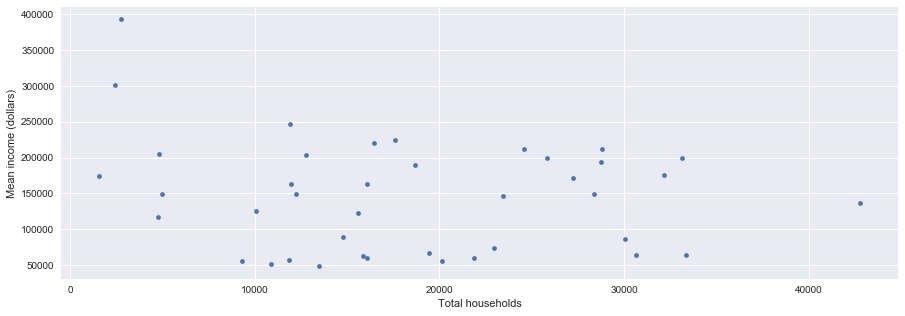

In [85]:
ax = m_income.plot.scatter(x='Total households' ,
                             y='Mean income (dollars)',
                             figsize=(15,5))

#### Staten Island

We'll finish up our exploration of the distribution of PreK locations in NYC with Staten Island--the borough with the least amount of PreK for All locations AND Non-Public PreK locations.

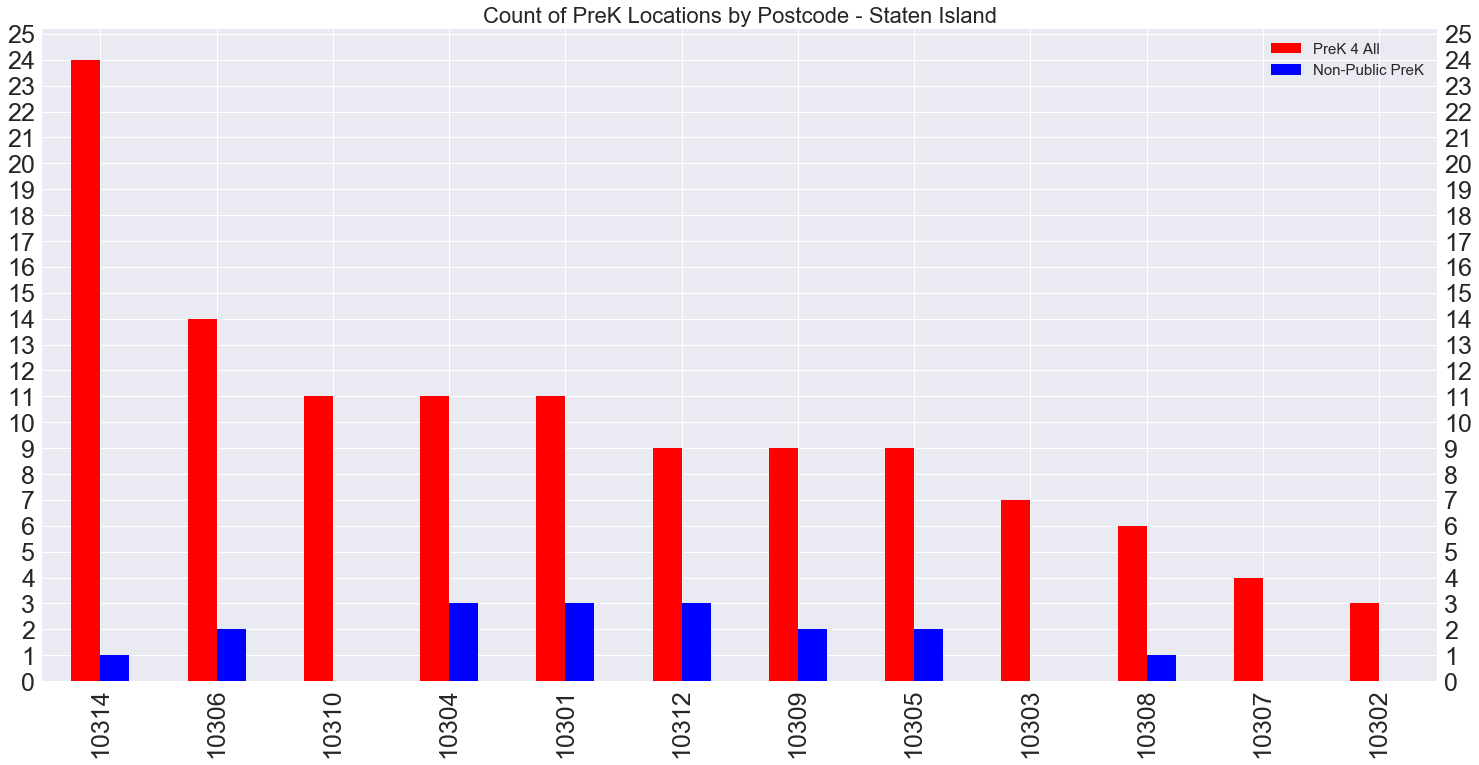

In [86]:
graph_si = staten_island['Postcode'].value_counts().rename('PK4A').to_frame()\
               .join(p_staten_island['Postcode'].value_counts().rename('NPPK').to_frame())

ax = graph_si.plot(kind='bar', figsize=(25,12), color=my_colors)
ax.set_title('Count of PreK Locations by Postcode - Staten Island', fontsize=22)
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.tick_params(labelsize=25.0, which='both',left=True, right=True, labeltop=False, labelbottom=True, labelright=True)
ax.legend(labels = ['PreK 4 All', 'Non-Public PreK'], fontsize = 15)

plt.show()

This graph makes it easy to see how few Non-Public PreK locations are in Staten Island. No one postcode sticks out either--of those with Non-Public PreK locations, they all fall within the range of 1-3. These postcodes also form the majority of postcodes represented in our data (8 of 12).<br>

Let's take a look at the income data for these postcodes:

In [87]:
si_income = pd.read_csv('Staten Island Mean Household Income Postcode.csv')

In [88]:
si_income = si_income.set_index('Postcode')

In [89]:
si_income.describe()

,Mean income (dollars),Total households
count,12.000000,12.000000
mean,90355.666667,13834.500000
std,15046.432905,7506.081153
min,65167.000000,5128.000000
25%,83232.750000,8259.000000
50%,90153.500000,12804.000000
75%,100573.750000,16069.500000
max,113839.000000,31297.000000


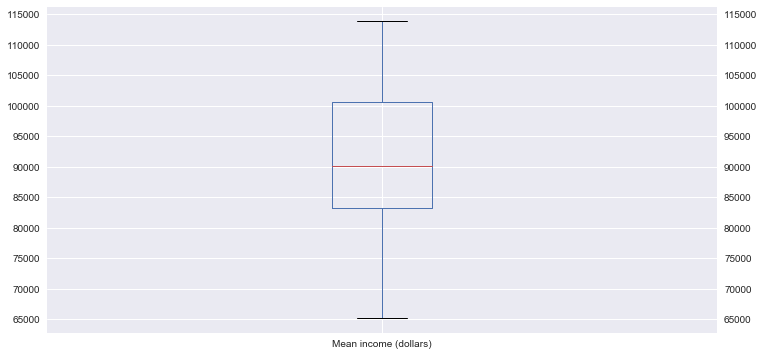

In [90]:
fig,ax = plt.subplots(figsize=(12,6))

ax = si_income.boxplot(column='Mean income (dollars)')
ax.yaxis.set_major_locator(MultipleLocator(5000.000))
ax.tick_params(left=True, right=True, labeltop=False, labelbottom=True, labelright=True)

plt.show()

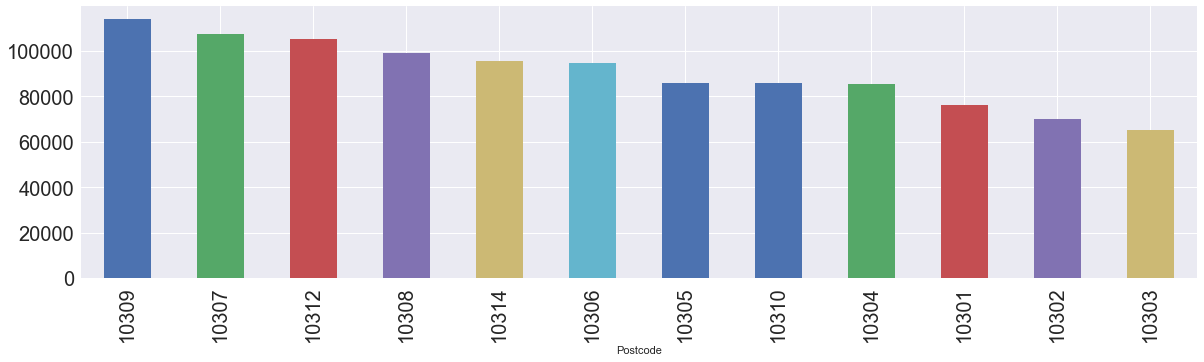

In [91]:
si_income['Mean income (dollars)'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5), fontsize=20)
plt.show()

Our income graph makes it easy to see that the mean income distribution of Staten Island is not that wide as compared to the other boroughs of NYC, and that mean incomes are comparatively high as well.<br>

We can also see that the Staten Island postcodes with the most PreK for All locations (10314, 24; 10306, 14) have above average mean incomes (>90,355.66):

In [92]:
si_income.loc[[10314,10306]]

,Mean income (dollars),Total households
Postcode,,
10314,95363,31297
10306,94409,20271


However, they do have above average Total Households (>13,834.50)--with 10314 having the greatest of any postcode in Staten Island.

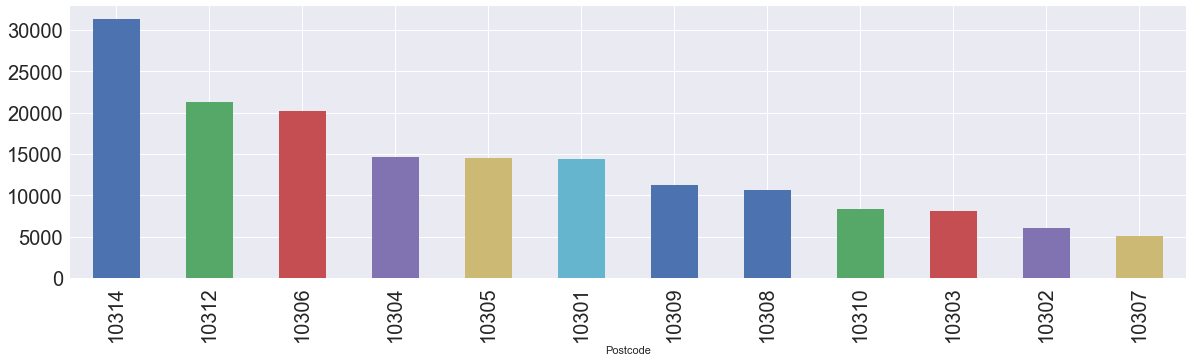

In [93]:
si_income['Total households'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5), fontsize=20)
plt.show()

Moreover, by looking at this distribution of households we see that the four Staten Island postcodes with no Non-Public PreK locations: 

In [94]:
graph_si.loc[[10310,10303,10302,10307]]

,PK4A,NPPK
10310,11,NaN
10303,7,NaN
10302,3,NaN
10307,4,NaN


Also have the lowest Total Households:

In [95]:
si_income['Total households'].sort_values(ascending=False).tail(4)

Postcode
10310    8304
10303    8124
10302    6072
10307    5128
Name: Total households, dtype: int64

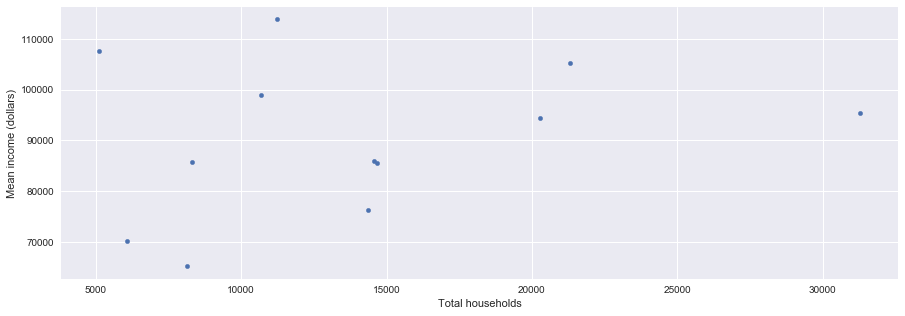

In [96]:
ax = si_income.plot.scatter(x='Total households' ,
                             y='Mean income (dollars)',
                             figsize=(15,5))

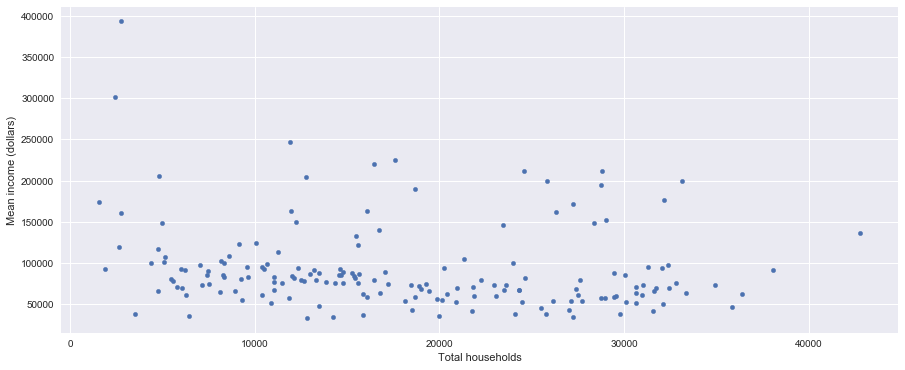

In [97]:
ax = nyc_income.plot.scatter(x='Total households' ,
                             y='Mean income (dollars)',
                             figsize=(15,6))

### Geographic Distribution Visualizations

Having explored the boroughs individually, I thought it would be interesting to visualize the actual geographic distribution of PreK locations throughout all of NYC.<br>

I prepared these visualizations in Tableau, and I think they speak for themselves:


<img src="PK4A vs NPubPK - Effective Buying Income.png">

<img src = "PK4A - Avg Household Size.png">

<img src = "PrivPK - Avg Household Size.png">

### PreK for All Program Seats

Having explored and compared the distribution of PreK for All locations and Non-Public PreK locations, I want to explore data related solely to PreK for All locations.<br>

I'll start by analyzing the distribution of program seats across NYC's five boroughs, broken up by PreK Type.

In [98]:
u_pk_seats = pd.pivot_table(u_pk, values='Seats', index=['Borough'],
                    columns=['PreK_Type'], aggfunc=np.sum)
u_pk_seats

PreK_Type,CHARTER,DOE,NYCEEC
Borough,,,
K,108.0,12495.0,16550.0
M,144.0,5056.0,5935.0
Q,54.0,9450.0,13848.0
R,NaN,2118.0,2870.0
X,214.0,5624.0,11905.0


In [99]:
u_pk_seats.fillna(value='0',inplace=True)

In [100]:
u_pk_seats['TOTAL SEATS'] = u_pk_seats.sum(axis=1)

u_pk_seats

PreK_Type,CHARTER,DOE,NYCEEC,TOTAL SEATS
Borough,,,,
K,108,12495.0,16550.0,29045.0
M,144,5056.0,5935.0,10991.0
Q,54,9450.0,13848.0,23298.0
R,0,2118.0,2870.0,4988.0
X,214,5624.0,11905.0,17529.0


What I am most interested in exploring is how this distribution of seats compares to current population data.

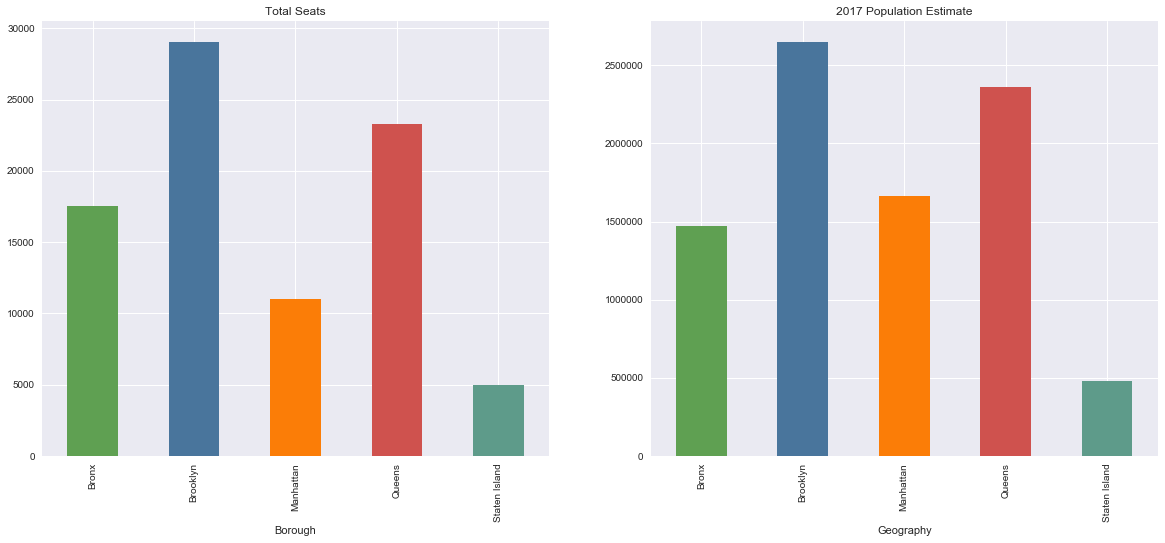

In [101]:
u_pk_seats = u_pk_seats.reindex(["X", "K", "M", "Q", "R"])

fig, axes = plt.subplots(1,2, figsize=(20,8))

plt.subplot(1,2,1)
pop_seat_color = list(['xkcd:muted green', 'xkcd:dull blue', 'xkcd:pumpkin orange', 'xkcd:dark coral','xkcd:grey teal'])
axes[0] = u_pk_seats['TOTAL SEATS'].plot(kind='bar',color=pop_seat_color, title='Total Seats')
axes[0].set_xticklabels(['Bronx', 'Brooklyn', 'Manhattan','Queens','Staten Island'])

plt.subplot(1,2,2)
boro_pop = nyc_pop.set_index('Geography')
axes[1] = boro_pop['Population Estimate - 2017'].plot(kind='bar', color=pop_seat_color, title='2017 Population Estimate')
axes[1].set_xticklabels(['Bronx', 'Brooklyn', 'Manhattan','Queens','Staten Island'])

plt.show()

<table><tr>
<td> <img src="PreK Seats per Borough.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="NYC Population by Borough.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

#### I think these graphs tell us something quite important about NYC's PreK for All initiative:<br>

The distribution of PreK for All program seats in each of NYC's five boroughs matches fairly closely to the population distribution of each borough--but there are notable differences.<br>

In Queens and Staten Island, the percentage of total PreK for All program seats are just slightly greater than the percentage of NYC's total population they account for:<br>

Queens: Seats 27.46%, Population 27.35% <br>
Staten Island: Seats 5.74%, Population 5.56% <br>

But in the Bronx, Brooklyn and Manhattan, the percentage gaps are much more noticeable: <br>

Bronx: Seats 20.42%, Population 17.06%<br>
Brooklyn: Seats 33.56%, Population 30.72%<br>
Manhattan: Seats 12.82%, Population 19.31%<br>

Manhattan contains 19.31% of NYC's population, but only contains 12.82% of its PreK for All program seats. This 6.49% seems to have been distributed to the other four boroughs. <br>
The largest portions have gone to the Bronx (3.36%) and Brooklyn (2.84%), which account for 6.2%, and the remaining .29% has been allocated to Queens and Staten Island (.11% and .19% respectively). <br>

What are the reasons behind this, we might ask ourselves. The answers lies in our earlier data exploration:<br>

Brooklyn and the Bronx, on average, have the lowest mean incomes per postcode of NYC's five boroughs--with the Bronx's overall average being drastically lower.<br>
Manhattan has, far and away, the highest mean incomes per postcode of NYC's five boroughs. It also contains the majority of Non-Public PreK locations in NYC's five boroughs.


In [102]:
pop_per_seat = np.divide(nyc_pop['Population Estimate - 2017'], u_pk_seats['TOTAL SEATS'])

pop_per_seat

0     83.927206
1     91.195421
2    151.462742
3    101.235385
4     96.122294
Name: Population Estimate - 2017, dtype: float64

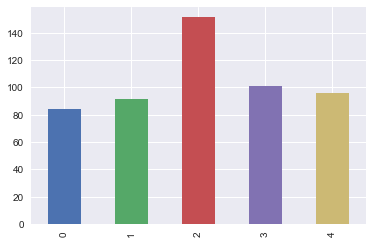

In [103]:
pop_per_seat.plot(kind='bar')

In [104]:
u_pk_seats_type = u_pk_seats.drop(columns='TOTAL SEATS')

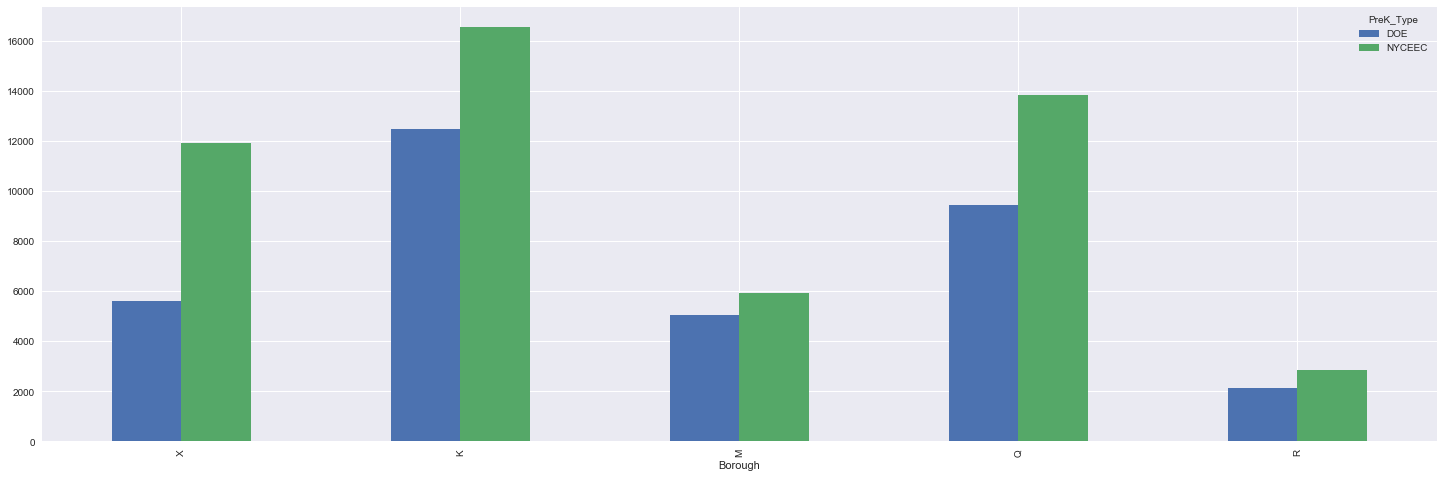

In [105]:
fig, ax = plt.subplots(figsize=(25,8))
u_pk_seats_type.plot(ax=ax, kind='bar')

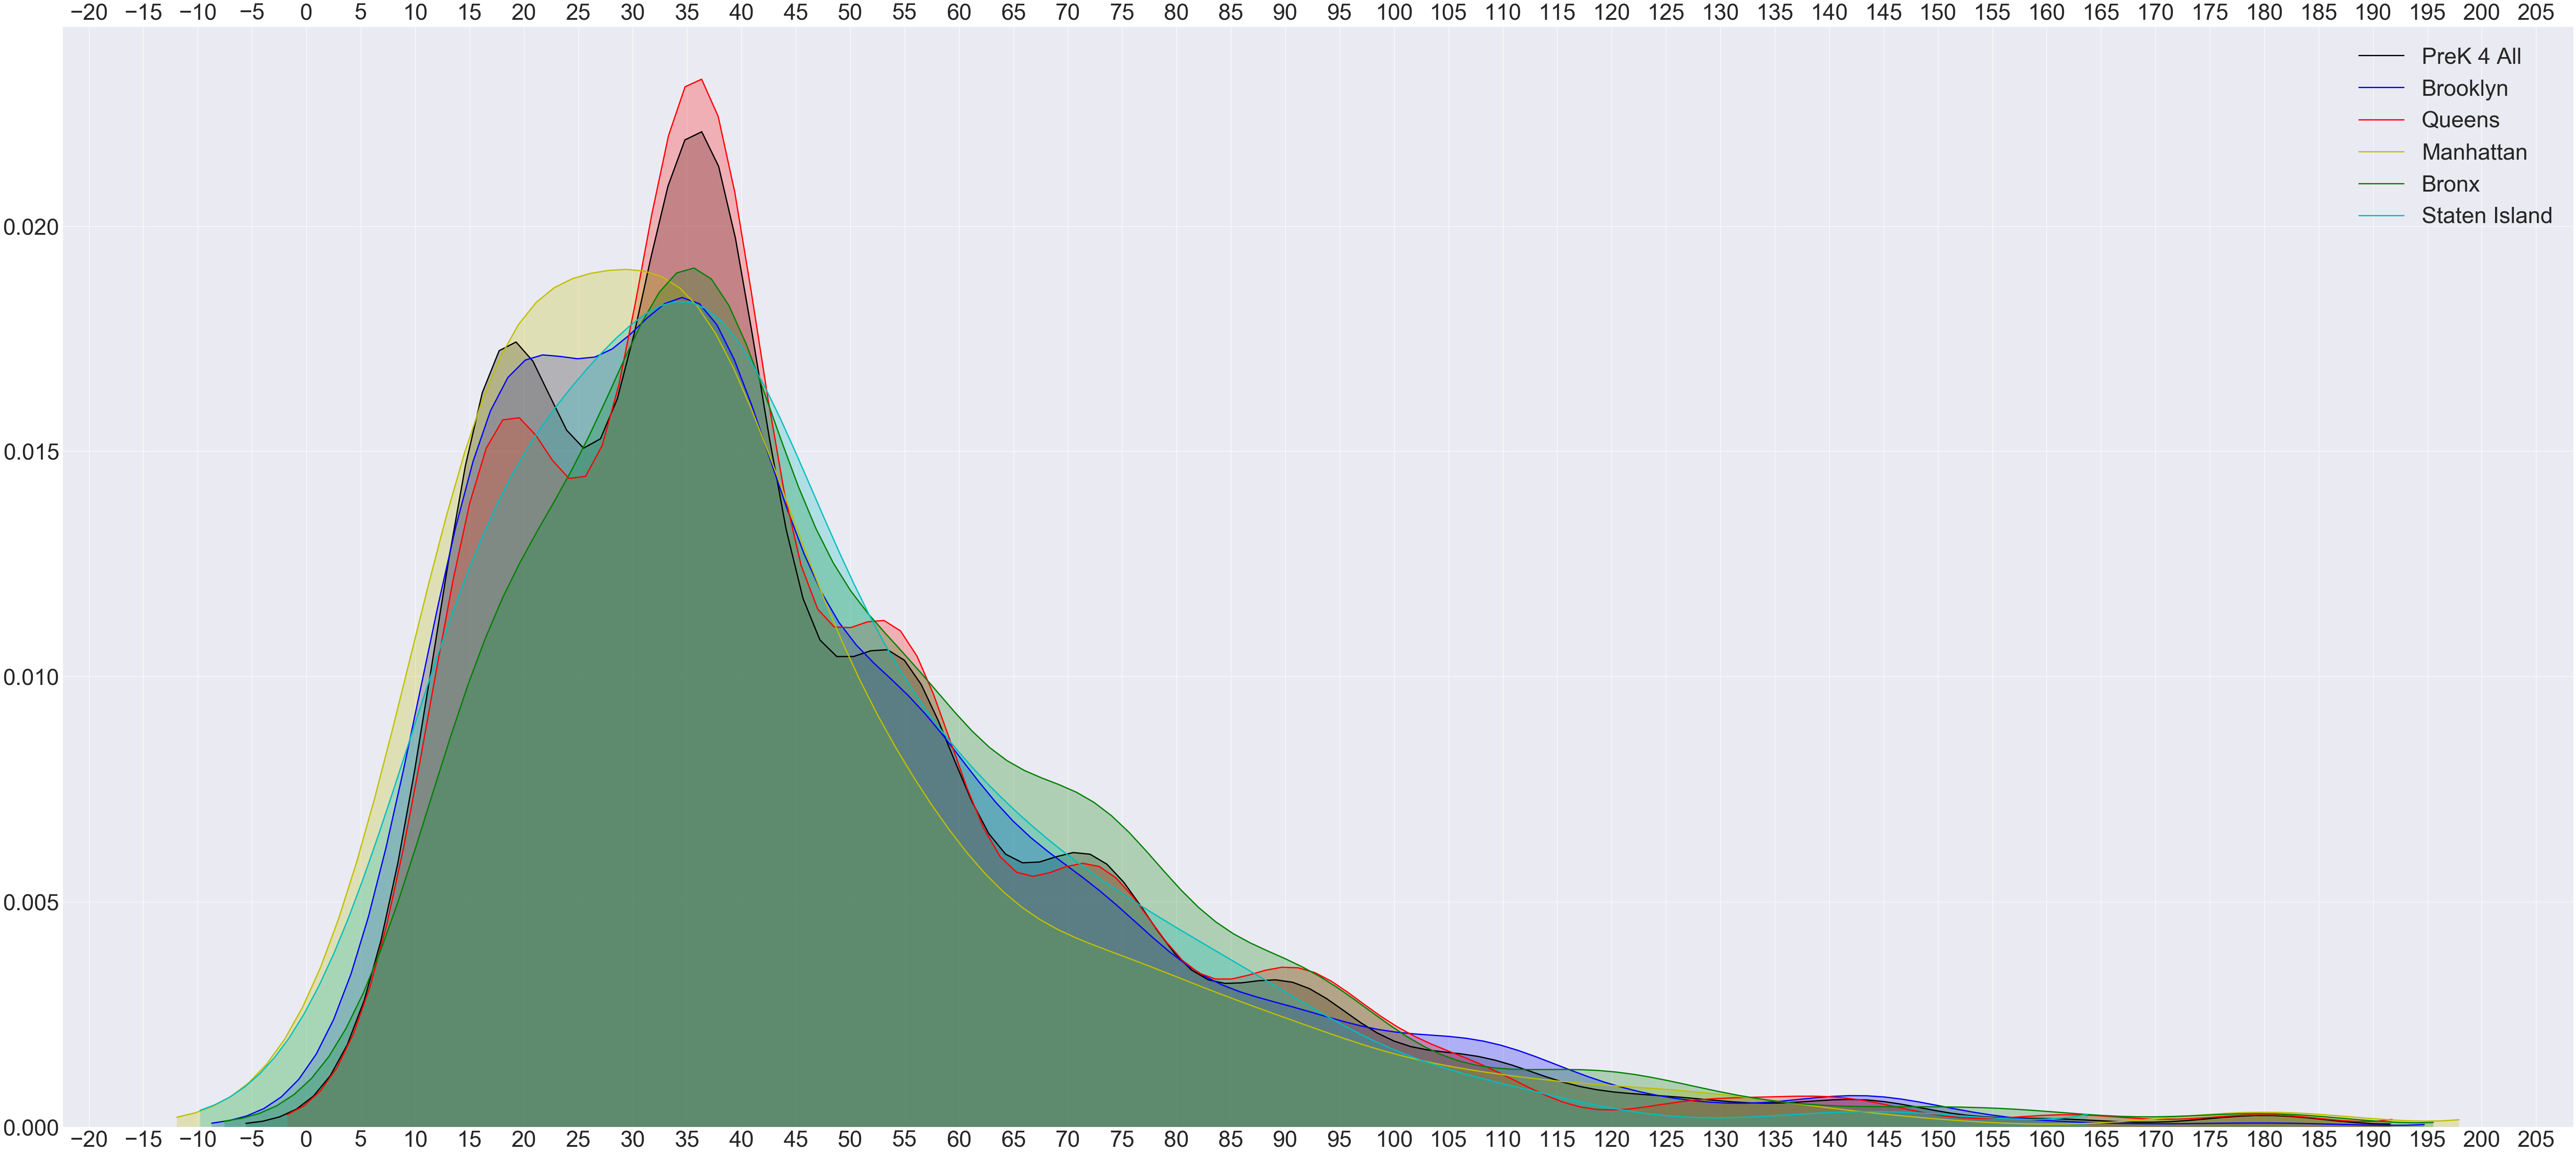

In [106]:
fig, ax = plt.subplots(figsize=(100,45))
sns.set()
sns.set_context("poster")
ax = sns.kdeplot(u_pk['Seats'], color='k', legend=True, shade=True, bw='scott', cut=2, clip=(0,200))
ax = sns.kdeplot(brooklyn['Seats'], color='b', legend=True,shade=True, bw='scott', cut=2, clip=(0,200))
ax = sns.kdeplot(queens['Seats'], color='r', legend=True,shade=True, bw='scott', cut=2, clip=(0,200))
ax = sns.kdeplot(manhattan['Seats'], color='y', legend=True,shade=True, bw='scott', cut=2, clip=(0,200))
ax = sns.kdeplot(bronx['Seats'], color='g', legend=True,shade=True, bw='scott', cut=2, clip=(0,200))
ax = sns.kdeplot(staten_island['Seats'], color='c', legend=True,shade=True, bw='scott', cut=2, clip=(0,200))

ax.xaxis.set_major_locator(MultipleLocator(5.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(1.0))
ax.tick_params(labelsize=50.0, which='both',top=True, bottom=True, labeltop=True)
ax.legend(labels = ['PreK 4 All', 'Brooklyn','Queens','Manhattan','Bronx','Staten Island'], fontsize = 50)

plt.show()